In [1]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the dataset
at_data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
#Ananlyse the data set
at_data
at_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...            136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [4]:
at_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
#Check if any values are missing
(at_data.isnull().sum()/len(at_data))*100
#We can see there are no missing values

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [6]:
#Separate Car model from company name.Derive car company from car name
companies= at_data['CarName'].str.split(expand =True)
at_data['car_company'] = companies.loc[:,0]
at_data['car_company'] 
at_data.head()
at_data.drop(columns =['CarName','car_ID'], inplace = True) 
#Dropping car_id as Id is not having any effect on price and is unique for each car

In [7]:
#Check for unique values for each columns
at_data.nunique()

symboling             6
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
car_company          28
dtype: int64

In [8]:
#Further analysing each column
at_data.groupby('car_company').count()['price'].sort_values(ascending=False)
#We can see that the car names are mis-spelt like for toyota,volkswagen etc. Handling them by correcting
correct_words ={"vokswagen":"volkswagen","vw":"volkswagen","toyouta":"toyota","porcshce":"porsche"}
at_data['car_company'] = at_data['car_company'].replace(correct_words)
at_data.groupby('car_company').count()['price'].sort_values(ascending=False)

car_company
toyota         32
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
maxda           2
mercury         1
Nissan          1
Name: price, dtype: int64

In [9]:
#Car company wrt price
at_data.groupby('car_company').mean()['price'].sort_values(ascending =False)

car_company
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          11320.600000
nissan         10704.882353
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
maxda           5645.000000
Nissan          5499.000000
Name: price, dtype: float64


<span style="color:blue; font-family:Georgia; font-size:1.5em;">We can see that car-company may have affect on price as the price varies with company.</span>

In [10]:
at_data.groupby('fueltype').sum()['price'].sort_values(ascending =False)

fueltype
gas       2404962.667
diesel     316763.000
Name: price, dtype: float64

In [11]:
at_data.groupby('enginesize').sum()['price'].sort_values(ascending =False)

enginesize
122    142821.000
108    130732.000
141    117370.000
98     114392.000
110    114321.000
183    113576.000
97     109419.000
209    108955.000
194    103584.000
92     101597.000
181     96694.000
152     95485.000
120     91743.000
121     91340.000
136     82625.000
109     82475.000
90      81675.000
234     69240.000
146     68494.000
258     67800.000
156     67715.000
130     67365.000
164     66640.000
171     48246.000
304     45400.000
131     41734.167
308     40960.000
134     36494.000
70      36435.000
326     36000.000
140     34783.000
91      32175.000
203     31400.500
145     22470.000
151     22018.000
173     21485.000
132     19190.000
161     15750.000
80      15645.000
119     11048.000
103      7099.000
111      6785.000
79       5399.000
61       5151.000
Name: price, dtype: float64

In [12]:

at_data.groupby('curbweight').sum()['price'].sort_values(ascending =False)

curbweight
4066    67800.0
2756    66556.0
3715    45400.0
3230    43200.0
2385    42318.0
3380    41315.0
3900    40960.0
3139    38098.0
2800    37028.0
3505    36880.0
3950    36000.0
3685    35056.0
3252    34850.0
3740    34184.0
2395    33355.0
3075    32210.0
3770    31600.0
3366    31400.5
2548    29995.0
3750    28248.0
3495    28176.0
3515    25552.0
3055    24565.0
2275    24181.0
3086    23875.0
2579    23140.0
2380    22790.0
3062    22625.0
3217    22470.0
2778    22018.0
         ...   
2094     7738.0
2240     7603.0
1971     7499.0
1950     7395.0
1951     7299.0
2010     7295.0
2109     7198.0
1956     7129.0
2017     7099.0
2120     7053.0
2365     6989.0
2081     6938.0
2280     6918.0
1819     6855.0
1938     6849.0
1905     6795.0
1945     6695.0
2004     6669.0
1940     6529.0
2015     6488.0
1713     6479.0
2040     6338.0
1944     6189.0
1900     6095.0
1889     5499.0
1837     5399.0
1985     5348.0
1890     5195.0
1488     5151.0
2050     5118.0
Name: price, 

In [13]:
at_data.groupby('wheelbase').mean()['price'].sort_values(ascending =False)

wheelbase
112.0    45400.000000
120.9    40960.000000
102.0    36000.000000
96.6     35056.000000
89.5     34528.000000
113.0    33900.000000
115.6    32892.000000
103.5    32213.333333
110.0    30226.666667
106.7    28176.000000
109.1    20494.000000
105.8    20168.333333
101.2    18857.500000
91.3     18449.000000
99.2     18399.000000
104.9    18312.000000
108.0    18150.000000
99.5     17859.167000
99.4     17450.000000
102.7    16503.000000
102.9    16278.000000
104.3    16037.500000
104.5    15720.000000
107.9    15360.000000
99.1     15223.333333
114.2    15017.500000
88.6     14997.500000
99.8     14600.000000
98.4     14270.642857
95.9     13543.000000
100.4    13471.166667
95.3     13020.000000
96.0     11048.000000
102.4    10356.000000
98.8     10036.666667
96.9      9853.500000
96.1      9595.000000
97.0      9538.250000
96.5      9251.250000
94.5      9046.142857
103.3     8921.000000
96.3      8699.000000
97.2      8671.800000
97.3      8560.714286
95.1      8249.000000


<span style="color:blue; font-family:Georgia; font-size:2.5em;">Visualization</span>

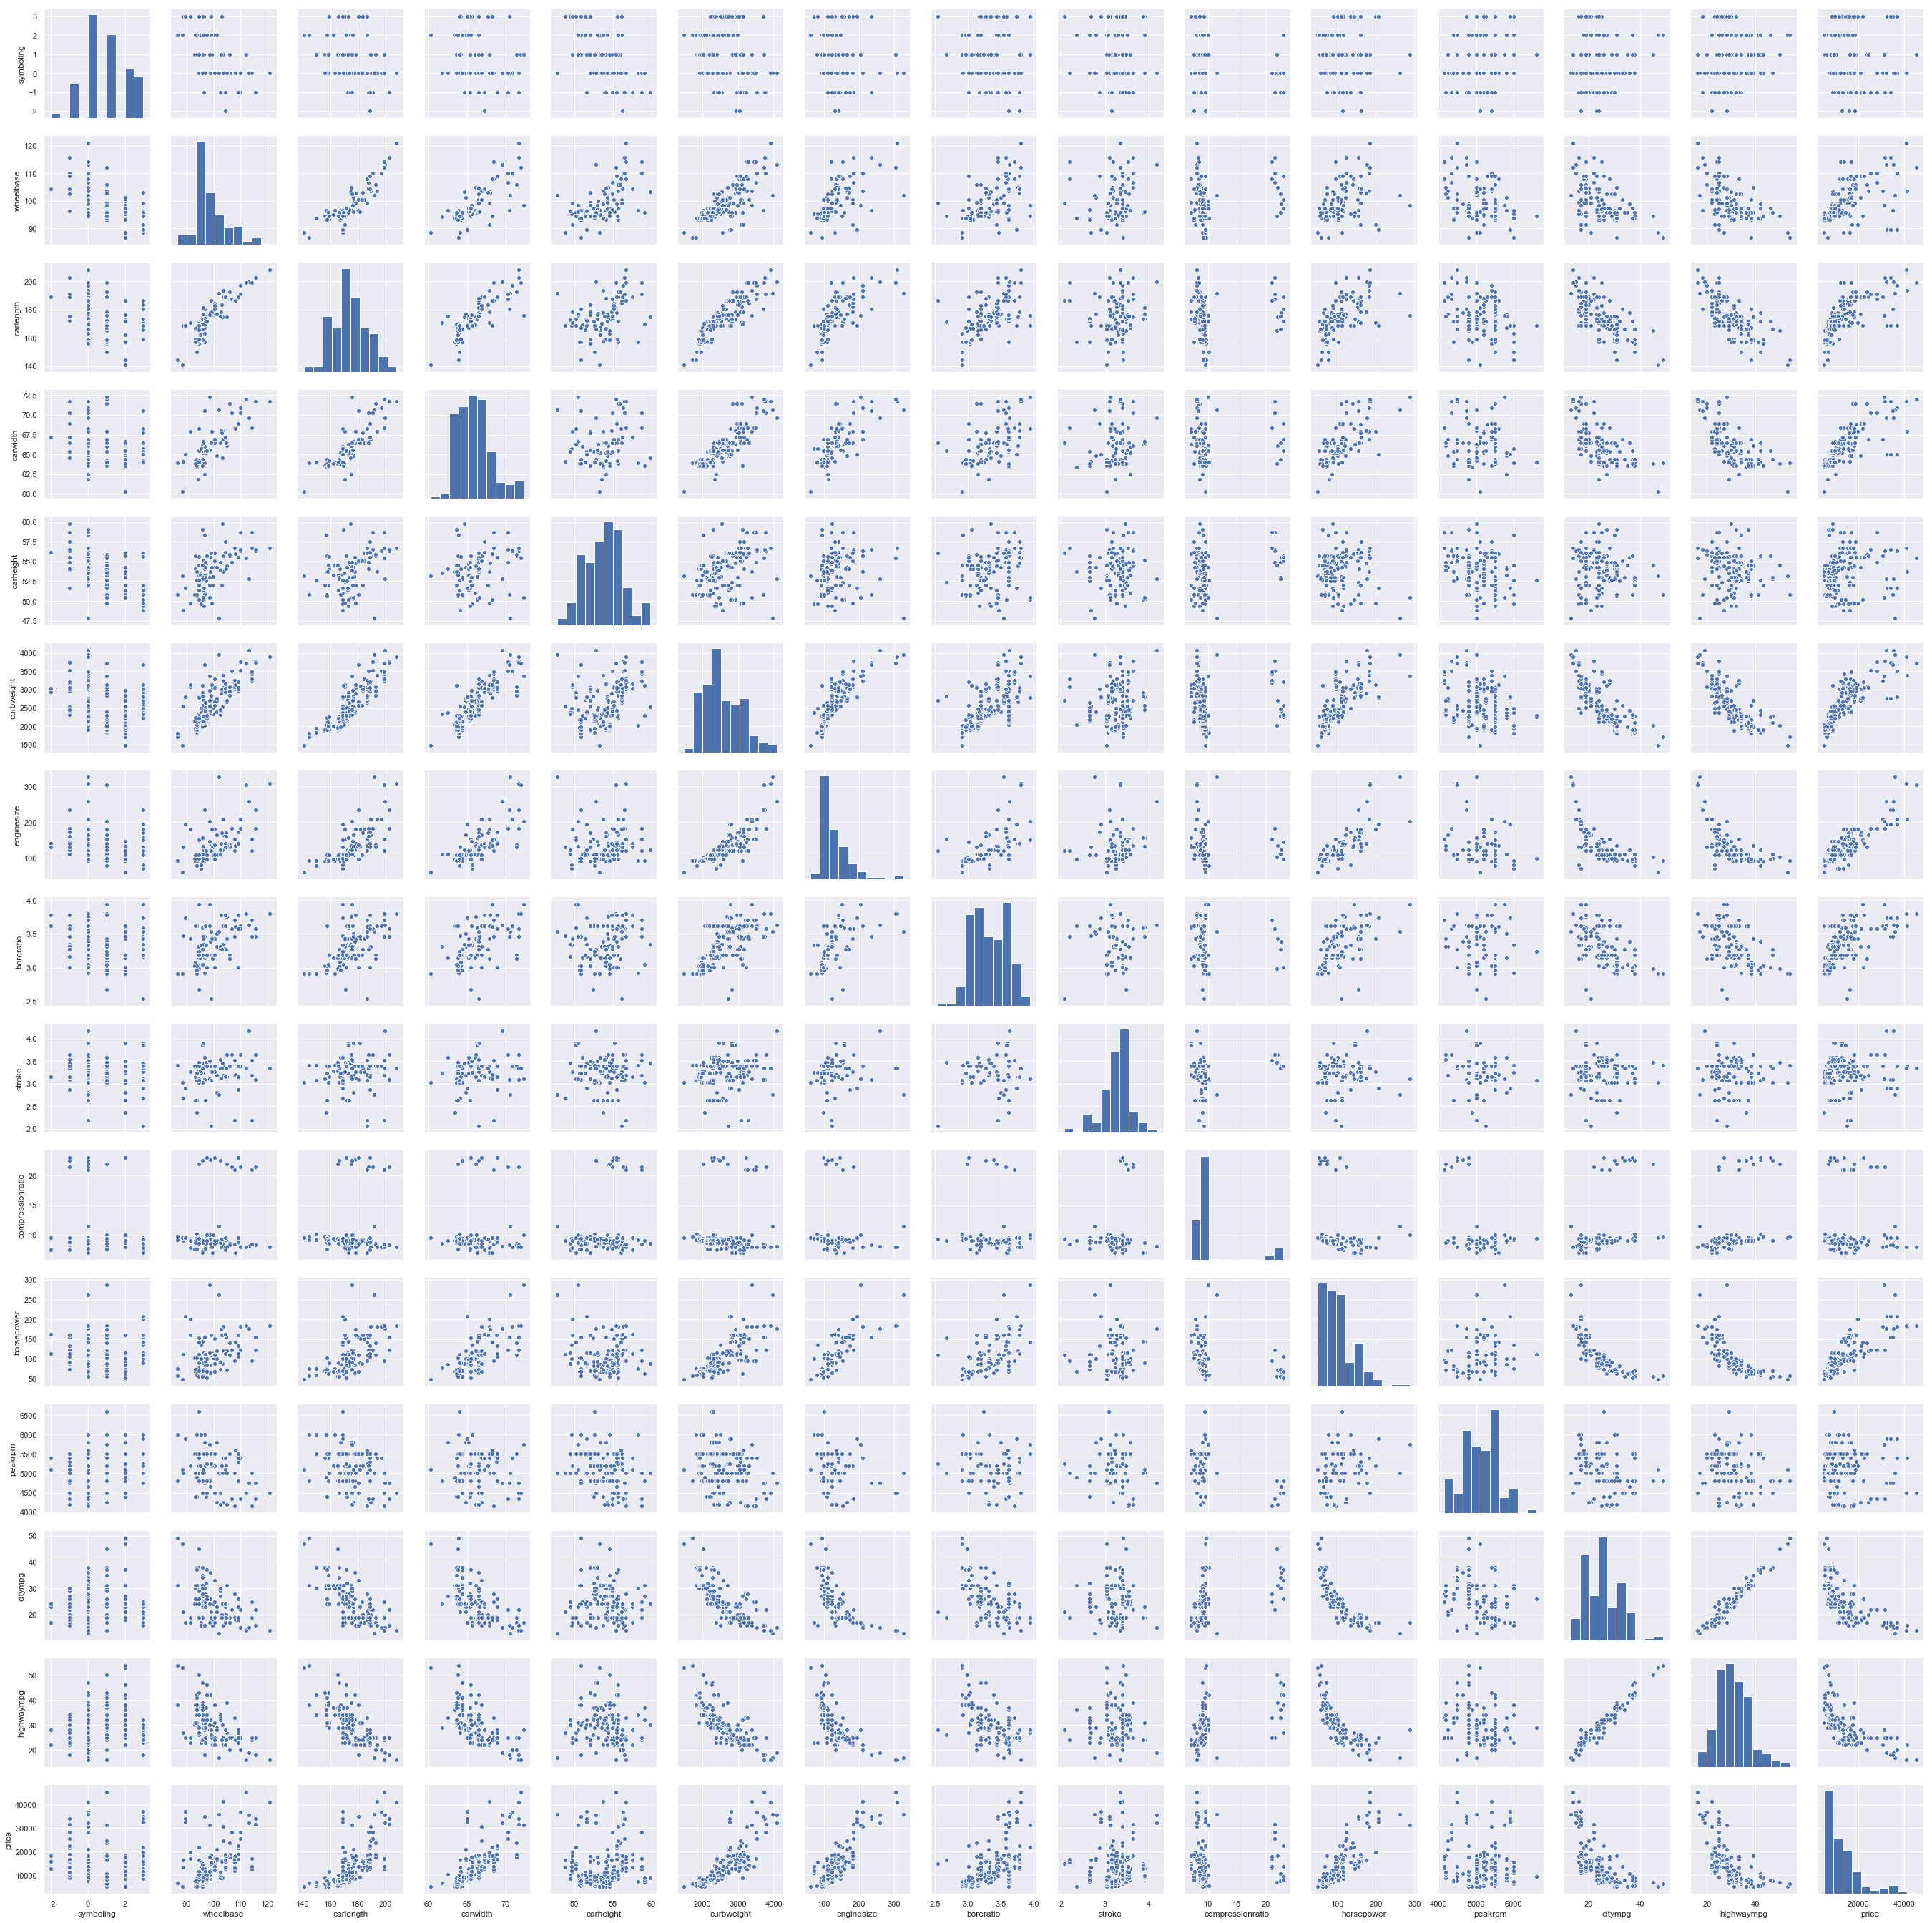

In [14]:
#Analysis numerical variables
sns.set(rc={'figure.figsize':(150,150)})
sns.pairplot(at_data)
plt.show()

<span style="color:blue; font-family:Georgia; font-size:1.5em;">We can see a  positive association of variables horsepower, carwidth,carlength,curbweight,enginesize and there is negative association of citympg,highwaympg may have affect on price as the price varies company
</span>


In [15]:
#create correlation matrix to see if there is an correlation
x = at_data.corr()
x

symboling  wheelbase  carlength  carwidth  carheight  \
symboling          1.000000  -0.531954  -0.357612 -0.232919  -0.541038   
wheelbase         -0.531954   1.000000   0.874587  0.795144   0.589435   
carlength         -0.357612   0.874587   1.000000  0.841118   0.491029   
carwidth          -0.232919   0.795144   0.841118  1.000000   0.279210   
carheight         -0.541038   0.589435   0.491029  0.279210   1.000000   
curbweight        -0.227691   0.776386   0.877728  0.867032   0.295572   
enginesize        -0.105790   0.569329   0.683360  0.735433   0.067149   
boreratio         -0.130051   0.488750   0.606454  0.559150   0.171071   
stroke            -0.008735   0.160959   0.129533  0.182942  -0.055307   
compressionratio  -0.178515   0.249786   0.158414  0.181129   0.261214   
horsepower         0.070873   0.353294   0.552623  0.640732  -0.108802   
peakrpm            0.273606  -0.360469  -0.287242 -0.220012  -0.320411   
citympg           -0.035823  -0.470414  -0.670909 -0.642704  -0.048640   
highwaympg         0.034606  -0.544082  -0.704662 -0.677218  -0.107358   
price             -0.079978   0.577816   0.682920  0.759325   0.119336   

                  curbweight  enginesize  boreratio    stroke  \
symboling          -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase           0.776386    0.569329   0.488750  0.160959   
carlength           0.877728    0.683360   0.606454  0.129533   
carwidth            0.867032    0.735433   0.559150  0.182942   
carheight           0.295572    0.067149   0.171071 -0.055307   
curbweight          1.000000    0.850594   0.648480  0.168790   
enginesize          0.850594    1.000000   0.583774  0.203129   
boreratio           0.648480    0.583774   1.000000 -0.055909   
stroke              0.168790    0.203129  -0.055909  1.000000   
compressionratio    0.151362    0.028971   0.005197  0.186110   
horsepower          0.750739    0.809769   0.573677  0.080940   
peakrpm            -0.266243   -0.244660  -0.254976 -0.067964   
citympg            -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg         -0.797465   -0.677470  -0.587012 -0.043931   
price               0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbweight         -0.797465  0.835305  
enginesize         -0.677470  0.874145  
boreratio          -0.587012  0.553173  
stroke             -0.043931  0.079443  
compressionratio    0.265201  0.067984  
horsepower         -0.770544  0.808139  
peakrpm            -0.054275 -0.085267  
citympg             0.971337 -0.685751  
highwaympg          1.000000 -0.697599  
price              -0.697599  1.000000

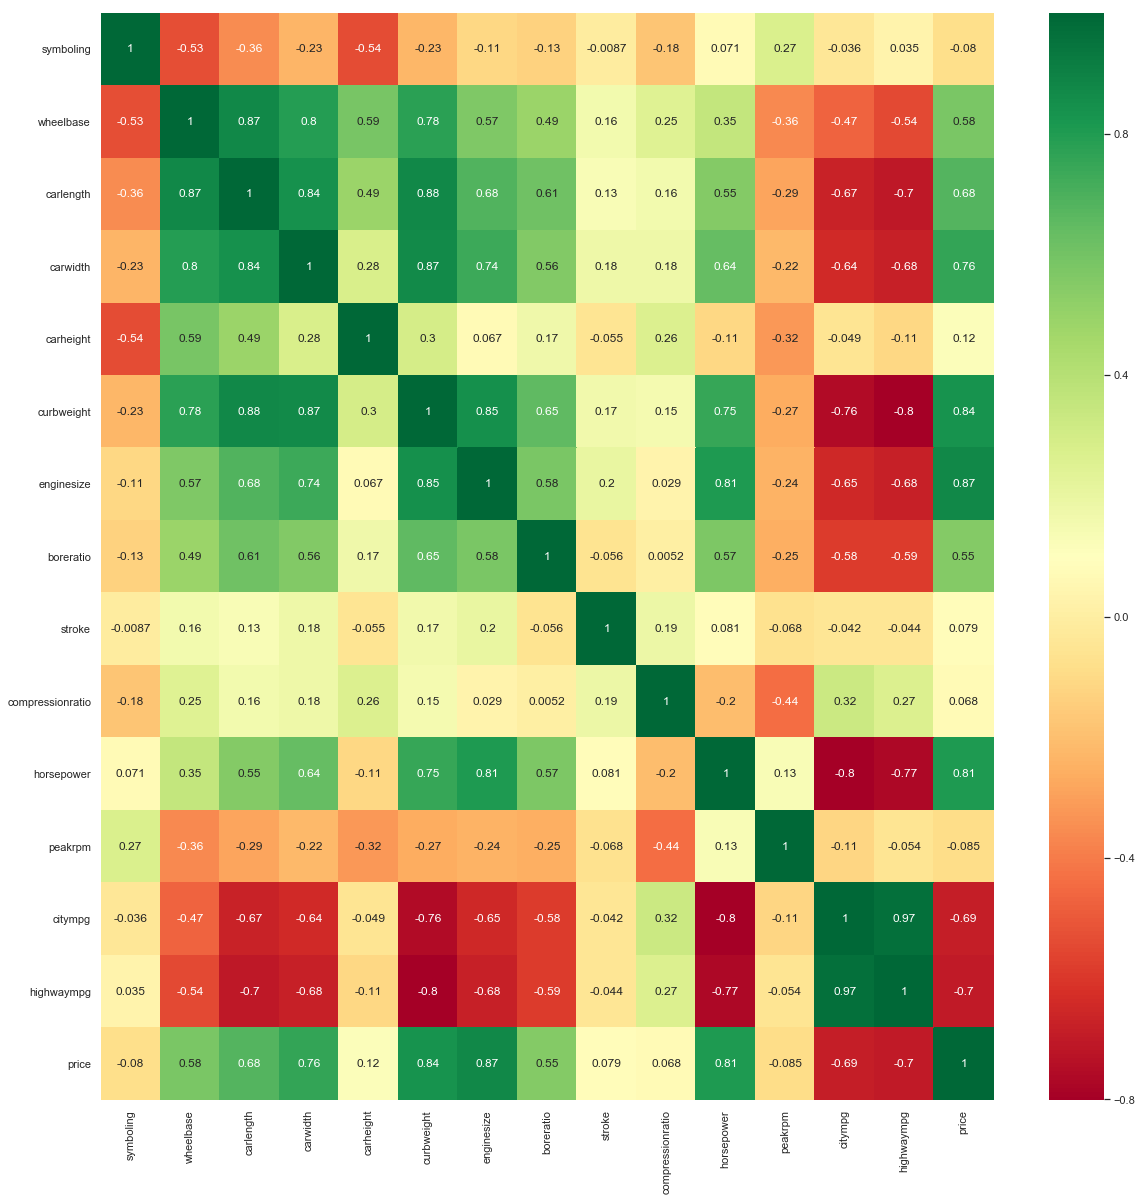

In [16]:
#Creating hatmap to visuaize correlations
plt.subplots(figsize =(20,20))
sns.heatmap(x,cmap='RdYlGn',annot =True)
plt.show()

<span style="color:blue; font-family:Georgia; font-size:1.5em;">We can see a  strong correlation with variables horsepower, curbweight,enginesize,carwidth,carlength and wheelbase.Also there is a strong correlation between citympg and highwaympg.
</span>


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

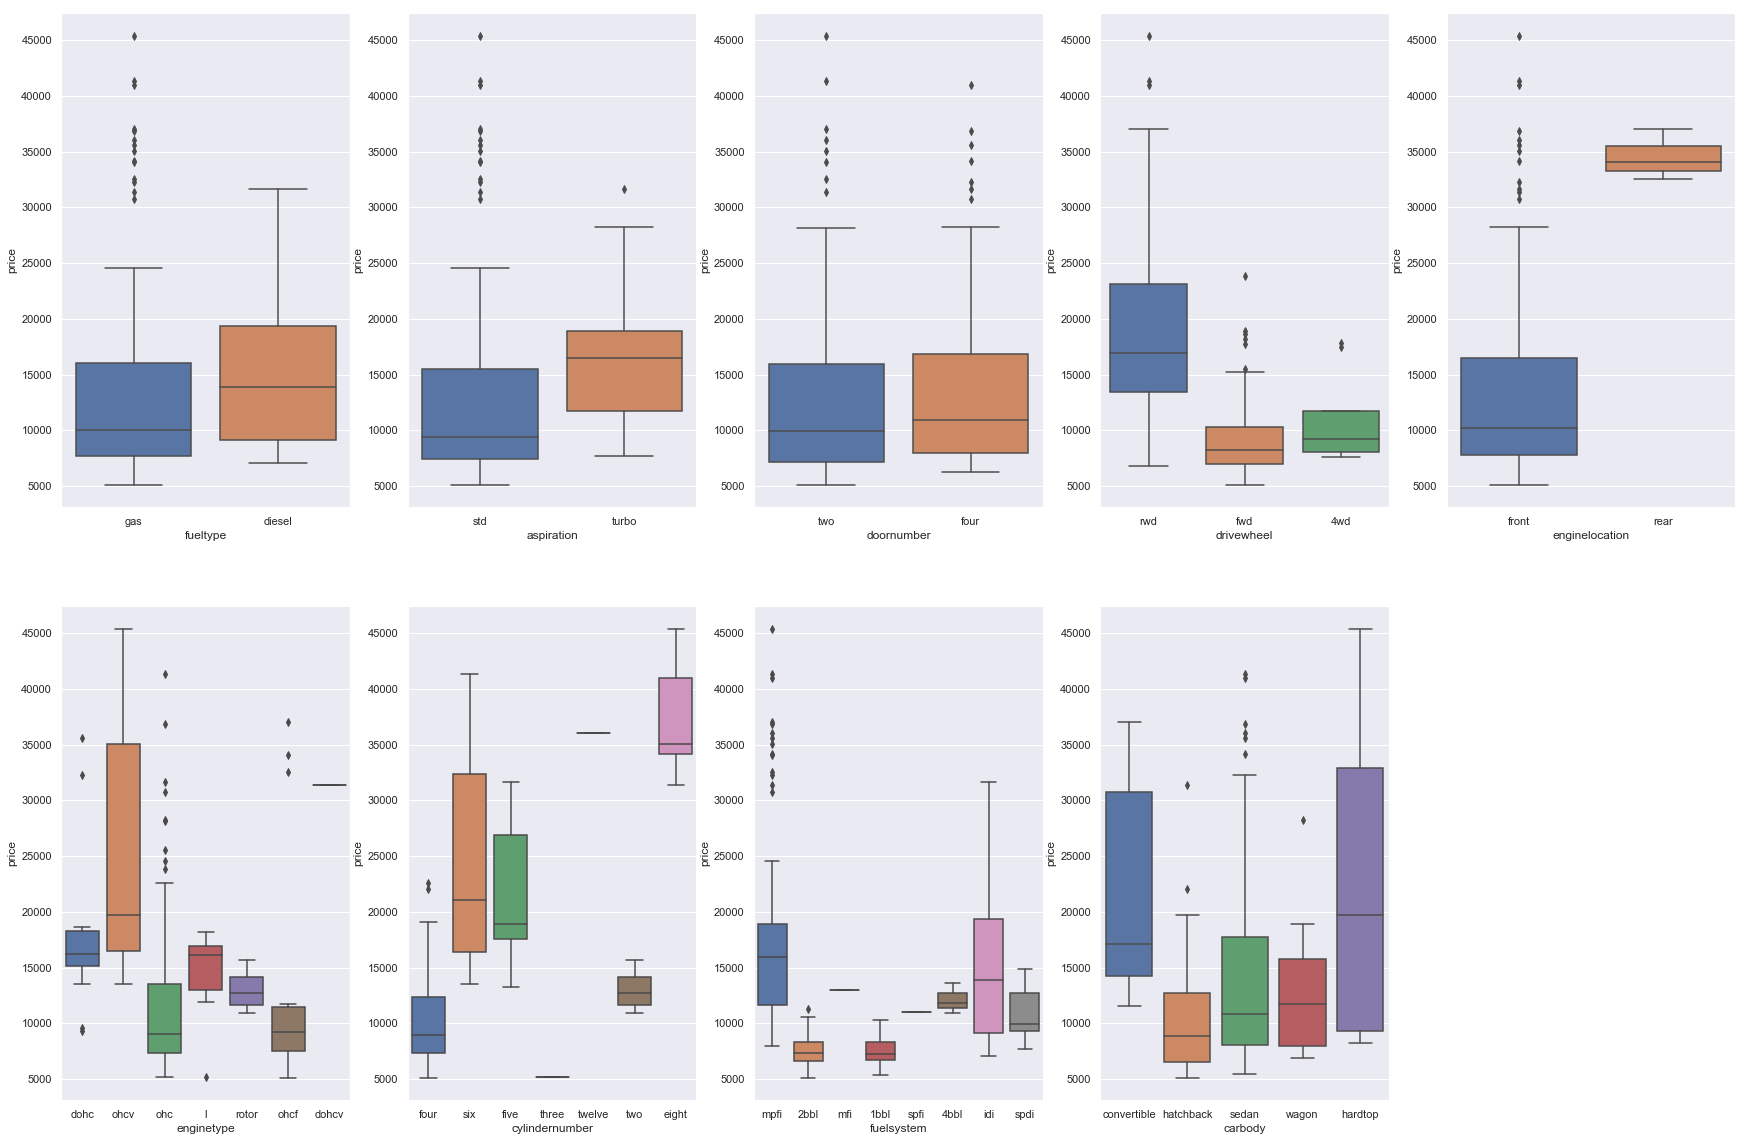

In [17]:
#Analysing the categorical variables
plt.figure(figsize=(30,20))
plt.subplot(2,5,1)
sns.boxplot(x = 'fueltype',y ='price',data = at_data )
plt.subplot(2,5,2)
sns.boxplot(x = 'aspiration',y ='price',data = at_data )
plt.subplot(2,5,3)
sns.boxplot(x = 'doornumber',y ='price',data = at_data )
plt.subplot(2,5,4)
sns.boxplot(x = 'drivewheel',y ='price',data = at_data )
plt.subplot(2,5,5)
sns.boxplot(x = 'enginelocation',y ='price',data = at_data )
plt.subplot(2,5,6)
sns.boxplot(x = 'enginetype',y ='price',data = at_data )
plt.subplot(2,5,7)
sns.boxplot(x = 'cylindernumber',y ='price',data = at_data )
plt.subplot(2,5,8)
sns.boxplot(x = 'fuelsystem',y ='price',data = at_data )
plt.subplot(2,5,9)
sns.boxplot(x = 'carbody',y ='price',data = at_data )


at_data.info()

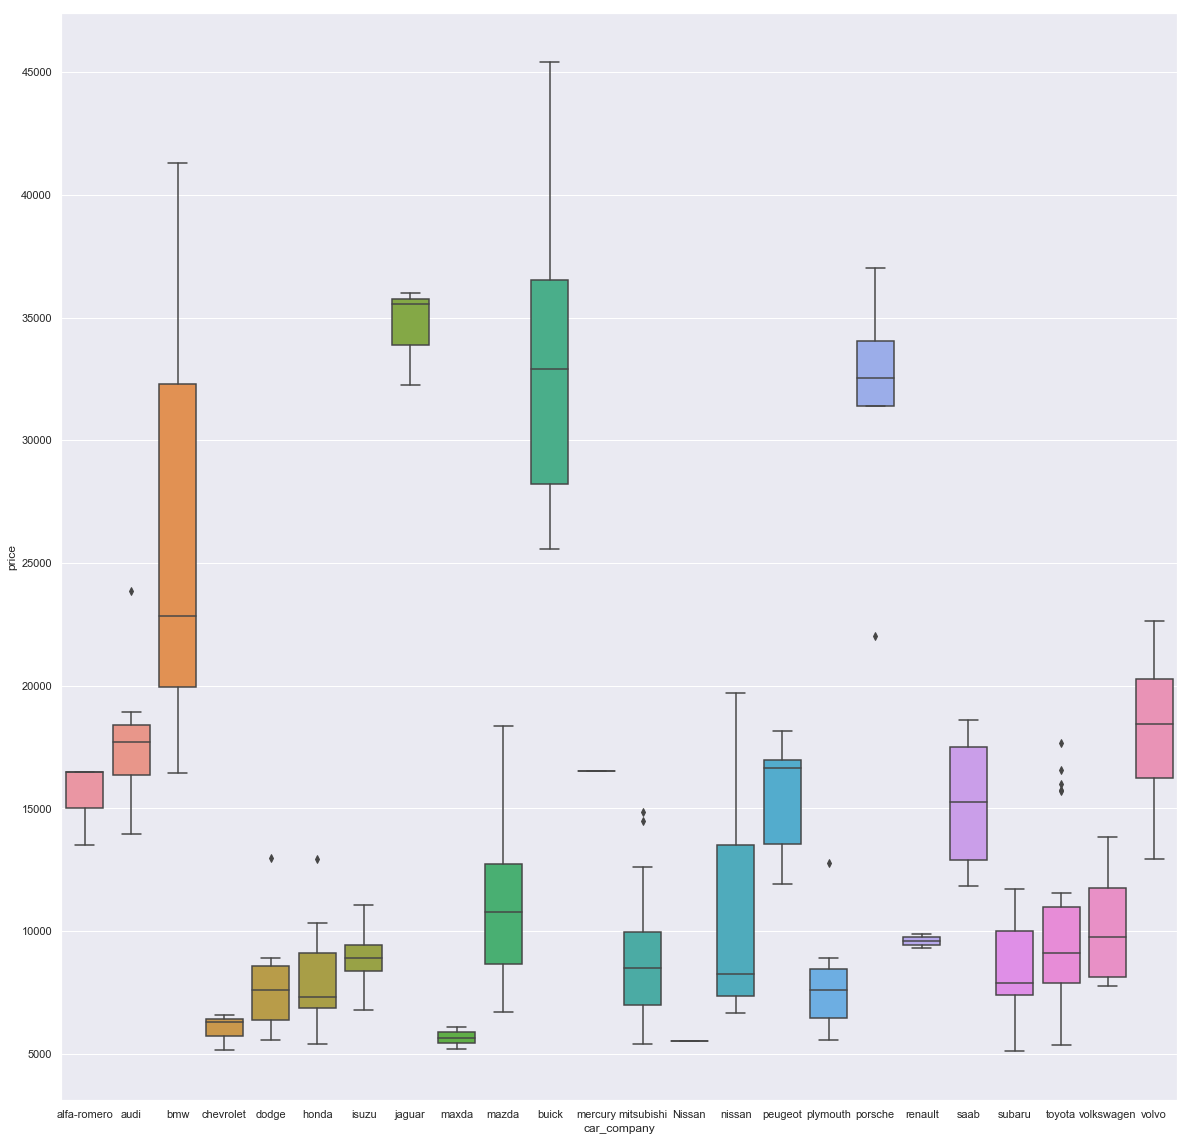

In [18]:
plt.figure(figsize=(20,20))
sns.boxplot(x = 'car_company',y ='price',data = at_data )

<span style="color:blue; font-family:Georgia; font-size:1.5em;">We can see some relations with variables  car_company, enginetype,cylindernumber,fuelssytem</span>

In [19]:
#Handling categorivcal variables
#Categorical variables that have only 2 values can be converted to binary and 2+ to dummy variabes
at_data.nunique()
at_data['fueltype'] = at_data['fueltype'].map({'gas':0,'diesel':1})
at_data['aspiration'] = at_data['aspiration'].map({'std':0,'turbo':1})
at_data['doornumber'] = at_data['doornumber'].map({'two':0,'four':1})
at_data['enginelocation'] = at_data['enginelocation'].map({'rear':0,'front':1})
at_data.drop(columns =['fueltype','aspiration','doornumber','enginelocation'],inplace = True)

In [20]:

#Function to create dummy variables
def create_dummies(df,col):
    dummies = pd.get_dummies(df[col],prefix=col,drop_first =True)
    df = pd.concat([df,dummies],axis =1)
    df.drop(columns = col,inplace = True)
    return df

at_data = create_dummies(at_data,"car_company")
at_data = create_dummies(at_data,"enginetype")
at_data = create_dummies(at_data,"fuelsystem")
at_data = create_dummies(at_data,"cylindernumber")
at_data = create_dummies(at_data,"drivewheel")
at_data = create_dummies(at_data,"carbody")
at_data

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
5            2       99.8      177.3      66.3       53.1        2507   
6            1      105.8      192.7      71.4       55.7        2844   
7            1      105.8      192.7      71.4       55.7        2954   
8            1      105.8      192.7      71.4       55.9        3086   
9            0       99.5      178.2      67.9       52.0        3053   
10           2      101.2      176.8      64.8       54.3        2395   
11           0      101.2      176.8      64.8       54.3        2395   
12           0      101.2      176.8      64.8       54.3        2710   
13           0      101.2      176.8      64.8       54.3        2765   
14           1      103.5      189.0      66.9       55.7        3055   
15           0      103.5      189.0      66.9       55.7        3230   
16           0      103.5      193.8      67.9       53.7        3380   
17           0      110.0      197.0      70.9       56.3        3505   
18           2       88.4      141.1      60.3       53.2        1488   
19           1       94.5      155.9      63.6       52.0        1874   
20           0       94.5      158.8      63.6       52.0        1909   
21           1       93.7      157.3      63.8       50.8        1876   
22           1       93.7      157.3      63.8       50.8        1876   
23           1       93.7      157.3      63.8       50.8        2128   
24           1       93.7      157.3      63.8       50.6        1967   
25           1       93.7      157.3      63.8       50.6        1989   
26           1       93.7      157.3      63.8       50.6        1989   
27           1       93.7      157.3      63.8       50.6        2191   
28          -1      103.3      174.6      64.6       59.8        2535   
29           3       95.9      173.2      66.3       50.2        2811   
..         ...        ...        ...       ...        ...         ...   
175         -1      102.4      175.6      66.5       53.9        2414   
176         -1      102.4      175.6      66.5       54.9        2414   
177         -1      102.4      175.6      66.5       53.9        2458   
178          3      102.9      183.5      67.7       52.0        2976   
179          3      102.9      183.5      67.7       52.0        3016   
180         -1      104.5      187.8      66.5       54.1        3131   
181         -1      104.5      187.8      66.5       54.1        3151   
182          2       97.3      171.7      65.5       55.7        2261   
183          2       97.3      171.7      65.5       55.7        2209   
184          2       97.3      171.7      65.5       55.7        2264   
185          2       97.3      171.7      65.5       55.7        2212   
186          2       97.3      171.7      65.5       55.7        2275   
187          2       97.3      171.7      65.5       55.7        2319   
188          2       97.3      171.7      65.5       55.7        2300   
189          3       94.5      159.3      64.2       55.6        2254   
190          3       94.5      165.7      64.0       51.4        2221   
191          0      100.4      180.2      66.9       55.1        2661   
192          0      100.4      180.2      66.9       55.1        2579   
193          0      100.4      183.1      66.9       55.1        2563   
194         -2      104.3      188.8      67.2       56.2        2912   
195         -1      104.3      188.8      67.2       57.5        3034   
196         -2      104.3      188.8      67.2       56.2        2935   
197         -1      104.3      188.8      67.2       57.5      

<span style="color:blue; font-family:Georgia; font-size:1.5em;">Building Model
1. The test-train split and scale the features.
2.Analysing the relations
3.Building model with one variable and then analysing stats

 </span>

In [21]:
#SPliting data into Test-Train data
from sklearn.model_selection import train_test_split
print('Splitting into training and testing...')
at_train, at_test = train_test_split(at_data, train_size = 0.70, test_size=0.30, random_state=32)
at_train

Splitting into training and testing...


symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
75           1      102.7      178.4      68.0       54.8        2910   
57           3       95.3      169.0      65.7       49.6        2385   
31           2       86.6      144.6      63.9       50.8        1819   
10           2      101.2      176.8      64.8       54.3        2395   
132          3       99.1      186.6      66.5       56.1        2658   
5            2       99.8      177.3      66.3       53.1        2507   
108          0      107.9      186.7      68.4       56.7        3197   
113          0      114.2      198.9      68.4       56.7        3285   
67          -1      110.0      190.9      70.3       56.5        3515   
12           0      101.2      176.8      64.8       54.3        2710   
13           0      101.2      176.8      64.8       54.3        2765   
172          2       98.4      176.2      65.6       53.0        2975   
16           0      103.5      193.8      67.9       53.7        3380   
91           1       94.5      165.3      63.8       54.5        1918   
96           1       94.5      165.3      63.8       54.5        1971   
55           3       95.3      169.0      65.7       49.6        2380   
58           3       95.3      169.0      65.7       49.6        2500   
38           0       96.5      167.5      65.2       53.3        2289   
41           0       96.5      175.4      65.2       54.1        2465   
45           0       94.5      155.9      63.6       52.0        1909   
137          2       99.1      186.6      66.5       56.1        2847   
30           2       86.6      144.6      63.9       50.8        1713   
19           1       94.5      155.9      63.6       52.0        1874   
141          0       97.2      172.0      65.4       52.5        2145   
97           1       94.5      170.2      63.8       53.5        2037   
135          2       99.1      186.6      66.5       56.1        2758   
159          0       95.7      166.3      64.4       52.8        2275   
36           0       96.5      157.1      63.9       58.3        2024   
169          2       98.4      176.2      65.6       52.0        2551   
123         -1      103.3      174.6      64.6       59.8        2535   
..         ...        ...        ...       ...        ...         ...   
120          1       93.7      157.3      63.8       50.6        1967   
192          0      100.4      180.2      66.9       55.1        2579   
62           0       98.8      177.8      66.5       55.5        2410   
11           0      101.2      176.8      64.8       54.3        2395   
77           2       93.7      157.3      64.4       50.8        1944   
166          1       94.5      168.7      64.0       52.6        2300   
182          2       97.3      171.7      65.5       55.7        2261   
100          0       97.2      173.4      65.2       54.7        2302   
178          3      102.9      183.5      67.7       52.0        2976   
138          2       93.7      156.9      63.4       53.7        2050   
82           3       95.9      173.2      66.3       50.2        2833   
42           1       96.5      169.1      66.0       51.0        2293   
24           1       93.7      157.3      63.8       50.6        1967   
35           0       96.5      163.4      64.0       54.5        2010   
162          0       95.7      166.3      64.4       52.8        2140   
65           0      104.9      175.0      66.1       54.4        2670   
195         -1      104.3      188.8      67.2       57.5        3034   
139          2       93.7      157.9      63.6       53.7        2120   
4            2       99.4      176.6      66.4       54.3        2824   
9            0       99.5      178.2      67.9       52.0        3053   
3            2       99.8      176.6      66.2       54.3        2337   
89           1       94.5      165.3      63.8       54.5        1889   
71          -1      115.6      202.6      71.7       56.5      

In [22]:
#Scaling variables as they are having different ranges.Using min-max scaling .

at_train.describe()

symboling   wheelbase   carlength    carwidth   carheight  curbweight  \
count  143.000000  143.000000  143.000000  143.000000  143.000000   143.00000   
mean     0.860140   98.725874  174.453147   66.002098   53.693007  2569.86014   
std      1.286996    5.809835   11.891581    2.183210    2.444645   528.82600   
min     -2.000000   86.600000  144.600000   61.800000   47.800000  1713.00000   
25%      0.000000   94.500000  166.550000   64.200000   52.000000  2142.50000   
50%      1.000000   97.000000  173.400000   65.600000   54.100000  2455.00000   
75%      2.000000  101.600000  181.900000   66.750000   55.500000  2923.50000   
max      3.000000  115.600000  202.600000   72.300000   59.800000  4066.00000   

       enginesize   boreratio      stroke  compressionratio      ...        \
count  143.000000  143.000000  143.000000        143.000000      ...         
mean   128.244755    3.352168    3.242972         10.245524      ...         
std     42.596405    0.269893    0.335742          4.079661      ...         
min     70.000000    2.540000    2.070000          7.000000      ...         
25%     97.000000    3.150000    3.090000          8.600000      ...         
50%    120.000000    3.330000    3.270000          9.000000      ...         
75%    141.000000    3.590000    3.410000          9.400000      ...         
max    326.000000    3.940000    4.170000         23.000000      ...         

       cylindernumber_six  cylindernumber_three  cylindernumber_twelve  \
count          143.000000                 143.0             143.000000   
mean             0.090909                   0.0               0.006993   
std              0.288490                   0.0               0.083624   
min              0.000000                   0.0               0.000000   
25%              0.000000                   0.0               0.000000   
50%              0.000000                   0.0               0.000000   
75%              0.000000                   0.0               0.000000   
max              1.000000                   0.0               1.000000   

       cylindernumber_two  drivewheel_fwd  drivewheel_rwd  carbody_hardtop  \
count          143.000000      143.000000      143.000000       143.000000   
mean             0.020979        0.573427        0.384615         0.048951   
std              0.143818        0.496318        0.488214         0.216524   
min              0.000000        0.000000        0.000000         0.000000   
25%              0.000000        0.000000        0.000000         0.000000   
50%              0.000000        1.000000        0.000000         0.000000   
75%              0.000000        1.000000        1.000000         0.000000   
max              1.000000        1.000000        1.000000         1.000000   

       carbody_hatchback  carbody_sedan  carbody_wagon  
count         143.000000     143.000000     143.000000  
mean            0.363636       0.454545       0.104895  
std             0.482737       0.499680       0.307495  
min             0.000000       0.000000       0.000000  
25%             0.000000       0.000000       0.000000  
50%             0.000000       0.000000       0.000000  
75%             1.000000       1.000000       0.000000  
max             1.000000       1.000000       1.000000  

[8 rows x 63 columns]

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [24]:
scaling_variable = ['wheelbase','symboling','carlength','carwidth','carheight','curbweight','horsepower','citympg','highwaympg','price','stroke','boreratio','compressionratio','enginesize','peakrpm']

at_train[scaling_variable] = scaler.fit_transform(at_train[scaling_variable])
at_train.describe()

symboling   wheelbase   carlength    carwidth   carheight  curbweight  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.572028    0.418134    0.514709    0.400200    0.491084    0.364156   
std      0.257399    0.200339    0.205027    0.207925    0.203720    0.224745   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.400000    0.272414    0.378448    0.228571    0.350000    0.182533   
50%      0.600000    0.358621    0.496552    0.361905    0.525000    0.315342   
75%      0.800000    0.517241    0.643103    0.471429    0.641667    0.514450   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       enginesize   boreratio      stroke  compressionratio      ...        \
count  143.000000  143.000000  143.000000        143.000000      ...         
mean     0.227519    0.580120    0.558558          0.202845      ...         
std      0.166392    0.192781    0.159877          0.254979      ...         
min      0.000000    0.000000    0.000000          0.000000      ...         
25%      0.105469    0.435714    0.485714          0.100000      ...         
50%      0.195312    0.564286    0.571429          0.125000      ...         
75%      0.277344    0.750000    0.638095          0.150000      ...         
max      1.000000    1.000000    1.000000          1.000000      ...         

       cylindernumber_six  cylindernumber_three  cylindernumber_twelve  \
count          143.000000                 143.0             143.000000   
mean             0.090909                   0.0               0.006993   
std              0.288490                   0.0               0.083624   
min              0.000000                   0.0               0.000000   
25%              0.000000                   0.0               0.000000   
50%              0.000000                   0.0               0.000000   
75%              0.000000                   0.0               0.000000   
max              1.000000                   0.0               1.000000   

       cylindernumber_two  drivewheel_fwd  drivewheel_rwd  carbody_hardtop  \
count          143.000000      143.000000      143.000000       143.000000   
mean             0.020979        0.573427        0.384615         0.048951   
std              0.143818        0.496318        0.488214         0.216524   
min              0.000000        0.000000        0.000000         0.000000   
25%              0.000000        0.000000        0.000000         0.000000   
50%              0.000000        1.000000        0.000000         0.000000   
75%              0.000000        1.000000        1.000000         0.000000   
max              1.000000        1.000000        1.000000         1.000000   

       carbody_hatchback  carbody_sedan  carbody_wagon  
count         143.000000     143.000000     143.000000  
mean            0.363636       0.454545       0.104895  
std             0.482737       0.499680       0.307495  
min             0.000000       0.000000       0.000000  
25%             0.000000       0.000000       0.000000  
50%             0.000000       0.000000       0.000000  
75%             1.000000       1.000000       0.000000  
max             1.000000       1.000000       1.000000  

[8 rows x 63 columns]

In [25]:
#Analysing the correlations
c = at_train.corr()
c['price'].sort_values(ascending = False)

price                     1.000000
enginesize                0.878659
curbweight                0.853372
horsepower                0.807751
carwidth                  0.769354
carlength                 0.694480
drivewheel_rwd            0.627243
wheelbase                 0.579987
fuelsystem_mpfi           0.550460
boreratio                 0.549867
car_company_buick         0.523027
cylindernumber_six        0.457345
enginetype_ohcv           0.420227
car_company_jaguar        0.373178
car_company_porsche       0.337052
cylindernumber_five       0.292738
carbody_hardtop           0.284866
car_company_bmw           0.277590
cylindernumber_twelve     0.228276
enginetype_dohcv          0.181151
carbody_sedan             0.132106
stroke                    0.116741
car_company_audi          0.114655
fuelsystem_idi            0.100253
car_company_volvo         0.090639
compressionratio          0.062382
car_company_peugeot       0.051382
enginetype_l              0.051382
carheight           

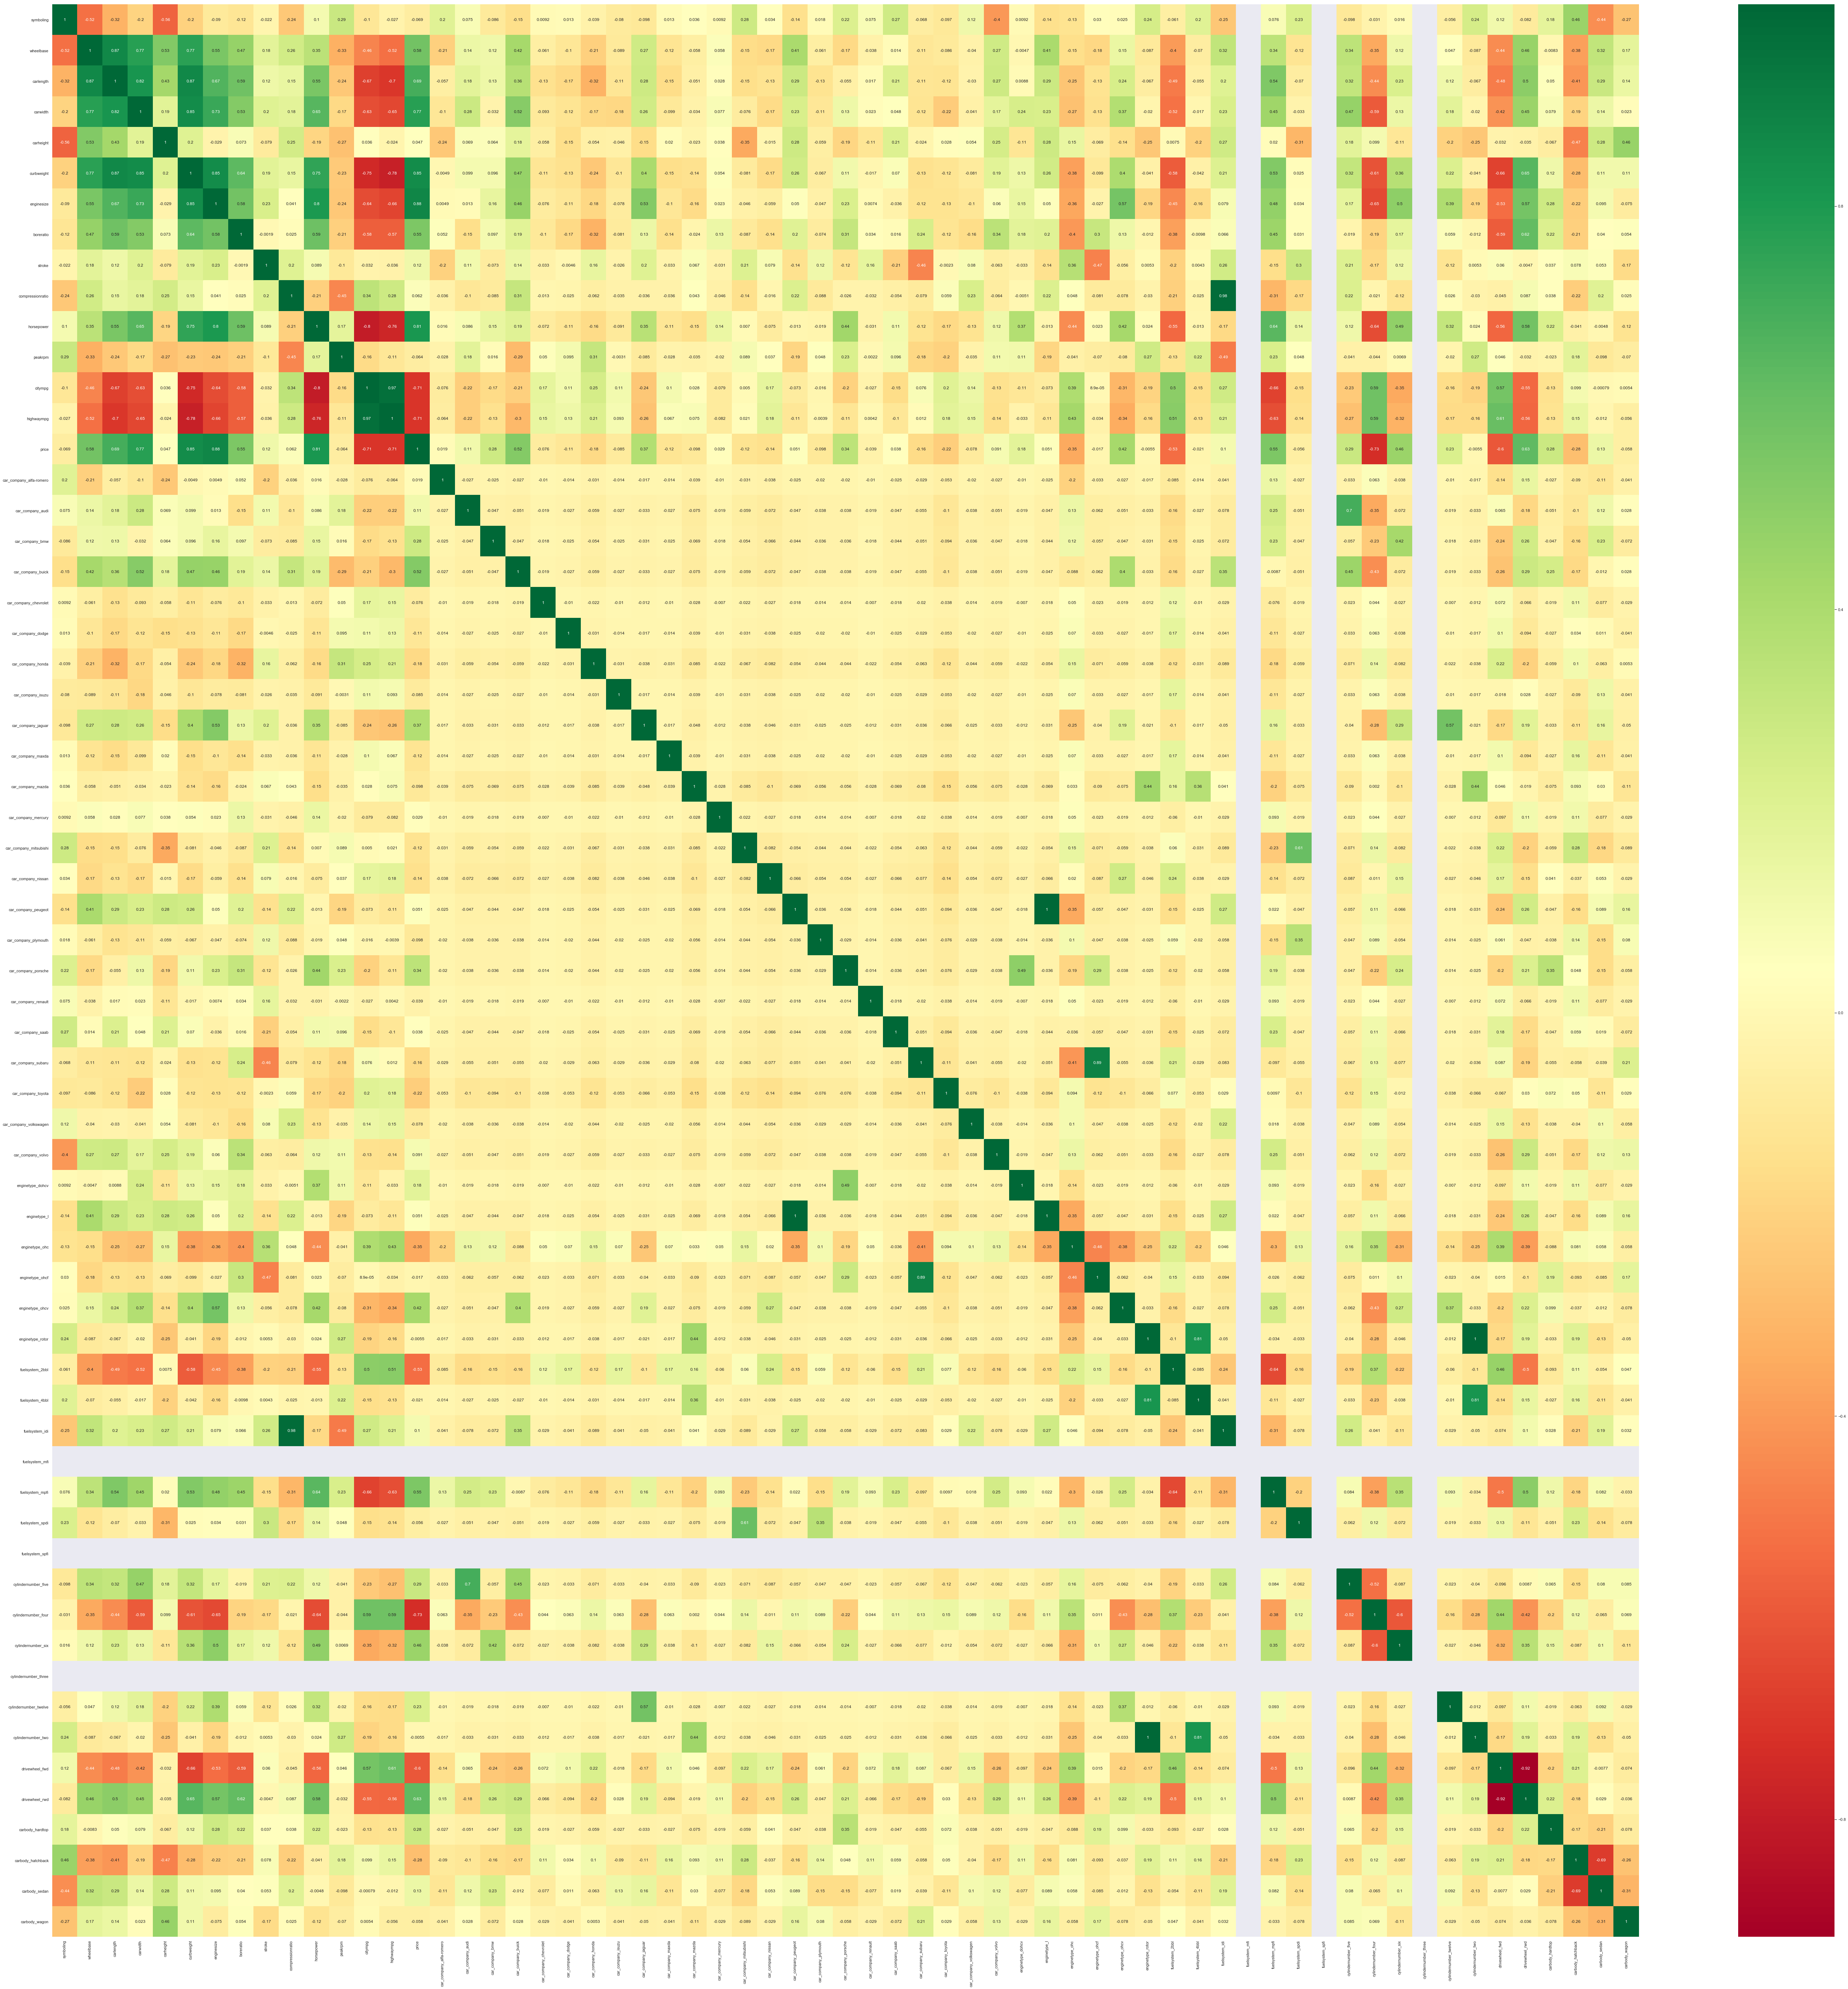

In [26]:
sns.set(rc={'figure.figsize':(150,150)})
plt.subplots(figsize =(100,100))
sns.heatmap(at_train.corr(),cmap='RdYlGn',annot =True)
plt.show()

<span style="color:blue; font-family:Georgia; font-size:1.5em;">EngineSize has the strongest correlation so it has some impact </span>

In [27]:
# start building our model by first finding the RFE.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
#We can see some linear relationship so we take this.Separate the data to X_train and y_train
y_train = at_train.pop('price')
y_train
X_train = at_train
X_train

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
75         0.6   0.555172   0.582759  0.590476   0.583333    0.508712   
57         1.0   0.300000   0.420690  0.371429   0.150000    0.285593   
31         0.8   0.000000   0.000000  0.200000   0.250000    0.045049   
10         0.8   0.503448   0.555172  0.285714   0.541667    0.289843   
132        1.0   0.431034   0.724138  0.447619   0.691667    0.401615   
5          0.8   0.455172   0.563793  0.428571   0.441667    0.337442   
108        0.4   0.734483   0.725862  0.628571   0.741667    0.630684   
113        0.4   0.951724   0.936207  0.628571   0.741667    0.668083   
67         0.2   0.806897   0.798276  0.809524   0.725000    0.765831   
12         0.4   0.503448   0.555172  0.285714   0.541667    0.423714   
13         0.4   0.503448   0.555172  0.285714   0.541667    0.447089   
172        0.8   0.406897   0.544828  0.361905   0.433333    0.536337   
16         0.4   0.582759   0.848276  0.580952   0.491667    0.708457   
91         0.6   0.272414   0.356897  0.190476   0.558333    0.087123   
96         0.6   0.272414   0.356897  0.190476   0.558333    0.109647   
55         1.0   0.300000   0.420690  0.371429   0.150000    0.283468   
58         1.0   0.300000   0.420690  0.371429   0.150000    0.334467   
38         0.4   0.341379   0.394828  0.323810   0.458333    0.244794   
41         0.4   0.341379   0.531034  0.323810   0.525000    0.319592   
45         0.4   0.272414   0.194828  0.171429   0.350000    0.083298   
137        0.8   0.431034   0.724138  0.447619   0.691667    0.481938   
30         0.8   0.000000   0.000000  0.200000   0.250000    0.000000   
19         0.6   0.272414   0.194828  0.171429   0.350000    0.068423   
141        0.4   0.365517   0.472414  0.342857   0.391667    0.183595   
97         0.6   0.272414   0.441379  0.190476   0.475000    0.137697   
135        0.8   0.431034   0.724138  0.447619   0.691667    0.444114   
159        0.4   0.313793   0.374138  0.247619   0.416667    0.238844   
36         0.4   0.341379   0.215517  0.200000   0.875000    0.132172   
169        0.8   0.406897   0.544828  0.361905   0.350000    0.356141   
123        0.2   0.575862   0.517241  0.266667   1.000000    0.349341   
..         ...        ...        ...       ...        ...         ...   
120        0.6   0.244828   0.218966  0.190476   0.233333    0.107947   
192        0.4   0.475862   0.613793  0.485714   0.608333    0.368041   
62         0.4   0.420690   0.572414  0.447619   0.641667    0.296218   
11         0.4   0.503448   0.555172  0.285714   0.541667    0.289843   
77         0.8   0.244828   0.218966  0.247619   0.250000    0.098173   
166        0.6   0.272414   0.415517  0.209524   0.400000    0.249469   
182        0.8   0.368966   0.467241  0.352381   0.658333    0.232894   
100        0.4   0.365517   0.496552  0.323810   0.575000    0.250319   
178        1.0   0.562069   0.670690  0.561905   0.350000    0.536762   
138        0.8   0.244828   0.212069  0.152381   0.491667    0.143221   
82         1.0   0.320690   0.493103  0.428571   0.200000    0.475988   
42         0.6   0.341379   0.422414  0.400000   0.266667    0.246494   
24         0.6   0.244828   0.218966  0.190476   0.233333    0.107947   
35         0.4   0.341379   0.324138  0.209524   0.558333    0.126222   
162        0.4   0.313793   0.374138  0.247619   0.416667    0.181470   
65         0.4   0.631034   0.524138  0.409524   0.550000    0.406715   
195        0.2   0.610345   0.762069  0.514286   0.808333    0.561411   
139        0.8   0.244828   0.229310  0.171429   0.491667    0.172971   
4          0.8   0.441379   0.551724  0.438095   0.541667    0.472163   
9          0.4   0.444828   0.579310  0.580952   0.350000    0.569486   
3          0.8   0.455172   0.551724  0.419048   0.541667    0.265193   
89         0.6   0.272414   0.356897  0.190476   0.558333    0.074798   
71         0.2   1.000000   1.000000  0.942857   0.725000    0.

In [29]:
linearmodel = LinearRegression()
linearmodel.fit(X_train,y_train)
#rank all features
rfe = RFE(linearmodel,25)
rfe = rfe.fit(X_train,y_train)

In [30]:
print ("Features sorted by their rank:")
list(zip( X_train.columns,rfe.support_,rfe.ranking_))

Features sorted by their rank:


[('symboling', False, 19),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', False, 25),
 ('car_company_alfa-romero', False, 22),
 ('car_company_audi', True, 1),
 ('car_company_bmw', True, 1),
 ('car_company_buick', True, 1),
 ('car_company_chevrolet', False, 16),
 ('car_company_dodge', False, 12),
 ('car_company_honda', False, 29),
 ('car_company_isuzu', False, 30),
 ('car_company_jaguar', False, 37),
 ('car_company_maxda', False, 20),
 ('car_company_mazda', False, 28),
 ('car_company_mercury', False, 7),
 ('car_company_mitsubishi', False, 9),
 ('car_company_nissan', False, 24),
 ('car_company_peugeot', True, 1),
 ('car_company_plymouth', False, 8),
 ('car_company_porsche', True, 1),
 ('car_company_renault', False, 32),

In [31]:
#Find the feature affecting by RFE
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'car_company_audi', 'car_company_bmw', 'car_company_buick',
       'car_company_peugeot', 'car_company_porsche', 'car_company_subaru',
       'enginetype_dohcv', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_idi', 'cylindernumber_five',
       'cylindernumber_two', 'carbody_hatchback'],
      dtype='object')

In [32]:
X_train.columns[~rfe.support_]

Index(['symboling', 'carheight', 'highwaympg', 'car_company_alfa-romero',
       'car_company_chevrolet', 'car_company_dodge', 'car_company_honda',
       'car_company_isuzu', 'car_company_jaguar', 'car_company_maxda',
       'car_company_mazda', 'car_company_mercury', 'car_company_mitsubishi',
       'car_company_nissan', 'car_company_plymouth', 'car_company_renault',
       'car_company_saab', 'car_company_toyota', 'car_company_volkswagen',
       'car_company_volvo', 'enginetype_l', 'enginetype_ohc',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'drivewheel_fwd', 'drivewheel_rwd',
       'carbody_hardtop', 'carbody_sedan', 'carbody_wagon'],
      dtype='object')

In [33]:
#Building model using statsmodel api
import statsmodels.api as sm
X_train_rfe = X_train[col]
#Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model = sm.OLS(y_train,X_train_rfe).fit()

In [34]:
#check the parameter values created
lr_model.params

const                  0.035091
wheelbase              0.033699
carlength             -0.146696
carwidth               0.264888
curbweight             0.281512
enginesize             0.579304
boreratio             -0.059973
stroke                -0.182550
compressionratio      -0.284494
horsepower             0.108064
peakrpm                0.077036
citympg                0.049656
car_company_audi       0.120709
car_company_bmw        0.172021
car_company_buick      0.194404
car_company_peugeot   -0.104870
car_company_porsche    0.096660
car_company_subaru    -0.232575
enginetype_dohcv      -0.105948
enginetype_ohcf        0.175789
enginetype_ohcv       -0.131437
enginetype_rotor       0.076271
fuelsystem_idi         0.257731
cylindernumber_five   -0.128747
cylindernumber_two     0.076271
carbody_hatchback     -0.032181
dtype: float64

In [35]:
#Analyzing the stats summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     91.78
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           5.76e-65
Time:                        21:23:58   Log-Likelihood:                 237.87
No. Observations:                 143   AIC:                            -425.7
Df Residuals:                     118   BIC:                            -351.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0351    

There is a high variance explained by these variables but at the same time there is a multicollinearity and features with hight p values which need to b handled

In [36]:
X_train_rfe.columns

Index(['const', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche',
       'car_company_subaru', 'enginetype_dohcv', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_idi',
       'cylindernumber_five', 'cylindernumber_two', 'carbody_hatchback'],
      dtype='object')

In [37]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =[ 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche',
       'car_company_subaru', 'enginetype_dohcv', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_idi',
       'cylindernumber_five', 'cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value= pd.DataFrame()
vif_value['Features'] = X_train_vif.columns
vif_value['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value['VIF'] =round(vif_value['VIF'],2)
vif_value = vif_value.sort_values(by='VIF', ascending =False)
vif_value

Features         VIF
23   cylindernumber_two         inf
20     enginetype_rotor         inf
7      compressionratio  143.230000
21       fuelsystem_idi   98.950000
1             carlength   77.030000
3            curbweight   59.930000
2              carwidth   50.500000
4            enginesize   41.550000
0             wheelbase   40.470000
8            horsepower   36.260000
6                stroke   34.780000
5             boreratio   33.480000
10              citympg   23.770000
18      enginetype_ohcf   19.750000
16   car_company_subaru   18.460000
9               peakrpm   13.120000
22  cylindernumber_five    6.000000
15  car_company_porsche    5.480000
11     car_company_audi    4.360000
13    car_company_buick    4.100000
19      enginetype_ohcv    3.110000
17     enginetype_dohcv    2.680000
14  car_company_peugeot    2.410000
24    carbody_hatchback    2.390000
12      car_company_bmw    1.440000

In [38]:
#Dropping oclumns with high p as well as VIF hvlaues
X_train_rfe.drop(columns =['wheelbase'],inplace =True)

#Analysing the stats again
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model = sm.OLS(y_train,X_train_rfe).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     96.29
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           6.84e-66
Time:                        21:23:58   Log-Likelihood:                 237.67
No. Observations:                 143   AIC:                            -427.3
Df Residuals:                     119   BIC:                            -356.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0319    

In [39]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =['carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche',
       'car_company_subaru', 'enginetype_dohcv', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_idi',
       'cylindernumber_five', 'cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value= pd.DataFrame()
vif_value['Features'] = X_train_vif.columns
vif_value['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value['VIF'] =round(vif_value['VIF'],2)
vif_value = vif_value.sort_values(by='VIF', ascending =False)
vif_value

Features         VIF
22   cylindernumber_two         inf
19     enginetype_rotor         inf
6      compressionratio  143.210000
20       fuelsystem_idi   98.890000
0             carlength   64.250000
2            curbweight   58.910000
1              carwidth   45.930000
3            enginesize   41.410000
7            horsepower   34.810000
5                stroke   34.640000
4             boreratio   33.460000
9               citympg   23.740000
17      enginetype_ohcf   19.750000
15   car_company_subaru   18.460000
8               peakrpm   13.120000
21  cylindernumber_five    5.990000
14  car_company_porsche    5.390000
10     car_company_audi    4.350000
12    car_company_buick    4.060000
18      enginetype_ohcv    2.970000
16     enginetype_dohcv    2.670000
23    carbody_hatchback    2.370000
13  car_company_peugeot    2.250000
11      car_company_bmw    1.400000

In [40]:
X_train_rfe.drop(columns =['enginetype_rotor'],inplace =True)
#Analysing the stats again
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model_1 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     96.29
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           6.84e-66
Time:                        21:23:58   Log-Likelihood:                 237.67
No. Observations:                 143   AIC:                            -427.3
Df Residuals:                     119   BIC:                            -356.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0319    

In [41]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =['carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche',
       'car_company_subaru', 'enginetype_dohcv', 'enginetype_ohcf',
       'enginetype_ohcv', 'fuelsystem_idi',
       'cylindernumber_five', 'cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value_1= pd.DataFrame()
vif_value_1['Features'] = X_train_vif.columns
vif_value_1['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value_1['VIF'] =round(vif_value_1['VIF'],2)
vif_value_1 = vif_value_1.sort_values(by='VIF', ascending =False)
vif_value_1

Features     VIF
6      compressionratio  143.21
19       fuelsystem_idi   98.89
0             carlength   64.25
2            curbweight   58.91
1              carwidth   45.93
3            enginesize   41.41
7            horsepower   34.81
5                stroke   34.64
4             boreratio   33.46
9               citympg   23.74
17      enginetype_ohcf   19.75
15   car_company_subaru   18.46
8               peakrpm   13.12
20  cylindernumber_five    5.99
14  car_company_porsche    5.39
10     car_company_audi    4.35
12    car_company_buick    4.06
18      enginetype_ohcv    2.97
16     enginetype_dohcv    2.67
22    carbody_hatchback    2.37
13  car_company_peugeot    2.25
21   cylindernumber_two    1.90
11      car_company_bmw    1.40

In [42]:
X_train_rfe.drop(columns =['compressionratio'],inplace =True)
#Analysing the stats again
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model_2 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     98.82
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           3.05e-66
Time:                        21:23:58   Log-Likelihood:                 235.85
No. Observations:                 143   AIC:                            -425.7
Df Residuals:                     120   BIC:                            -357.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0066    

In [43]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =['carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche',
       'car_company_subaru', 'enginetype_dohcv', 'enginetype_ohcf',
       'enginetype_ohcv', 'fuelsystem_idi',
       'cylindernumber_five', 'cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value_2= pd.DataFrame()
vif_value_2['Features'] = X_train_vif.columns
vif_value_2['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value_2['VIF'] =round(vif_value_2['VIF'],2)
vif_value_2 = vif_value_2.sort_values(by='VIF', ascending =False)
vif_value_2

Features    VIF
0             carlength  60.59
2            curbweight  58.83
1              carwidth  45.92
3            enginesize  35.79
6            horsepower  33.28
4             boreratio  32.90
5                stroke  26.06
16      enginetype_ohcf  19.70
14   car_company_subaru  18.44
8               citympg  12.65
7               peakrpm  11.04
19  cylindernumber_five   5.98
13  car_company_porsche   5.29
9      car_company_audi   4.35
11    car_company_buick   3.83
17      enginetype_ohcv   2.96
18       fuelsystem_idi   2.80
15     enginetype_dohcv   2.64
21    carbody_hatchback   2.36
12  car_company_peugeot   1.82
20   cylindernumber_two   1.52
10      car_company_bmw   1.36

In [44]:
X_train_rfe.drop(columns =['carlength'],inplace =True)
#Analysing the stats again
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model_3 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     100.4
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           2.62e-66
Time:                        21:23:58   Log-Likelihood:                 233.24
No. Observations:                 143   AIC:                            -422.5
Df Residuals:                     121   BIC:                            -357.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0461    

In [45]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =['carwidth', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche',
       'car_company_subaru', 'enginetype_dohcv', 'enginetype_ohcf',
       'enginetype_ohcv', 'fuelsystem_idi',
       'cylindernumber_five', 'cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value_3= pd.DataFrame()
vif_value_3['Features'] = X_train_vif.columns
vif_value_3['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value_3['VIF'] =round(vif_value_3['VIF'],2)
vif_value_3 = vif_value_3.sort_values(by='VIF', ascending =False)
vif_value_3

Features    VIF
1            curbweight  45.16
2            enginesize  35.52
5            horsepower  32.35
0              carwidth  31.60
3             boreratio  28.37
4                stroke  25.91
15      enginetype_ohcf  18.80
13   car_company_subaru  17.23
7               citympg  12.47
6               peakrpm  10.73
18  cylindernumber_five   5.84
12  car_company_porsche   4.67
8      car_company_audi   4.33
10    car_company_buick   3.75
16      enginetype_ohcv   2.88
17       fuelsystem_idi   2.79
14     enginetype_dohcv   2.63
20    carbody_hatchback   2.21
11  car_company_peugeot   1.76
19   cylindernumber_two   1.50
9       car_company_bmw   1.32

In [46]:
X_train_rfe.drop(columns =['curbweight'],inplace =True)
#Analysing the stats again
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model_4 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     97.02
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           4.68e-65
Time:                        21:23:59   Log-Likelihood:                 227.05
No. Observations:                 143   AIC:                            -412.1
Df Residuals:                     122   BIC:                            -349.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0204    

In [47]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =['carwidth','enginesize', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche',
       'car_company_subaru', 'enginetype_dohcv', 'enginetype_ohcf',
       'enginetype_ohcv', 'fuelsystem_idi',
       'cylindernumber_five', 'cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value_4= pd.DataFrame()
vif_value_4['Features'] = X_train_vif.columns
vif_value_4['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value_4['VIF'] =round(vif_value_4['VIF'],2)
vif_value_4 = vif_value_4.sort_values(by='VIF', ascending =False)
vif_value_4

Features    VIF
4            horsepower  30.85
1            enginesize  29.97
0              carwidth  26.42
2             boreratio  26.00
3                stroke  25.90
14      enginetype_ohcf  18.68
12   car_company_subaru  17.20
6               citympg  11.93
5               peakrpm  10.69
17  cylindernumber_five   5.77
11  car_company_porsche   4.52
7      car_company_audi   4.27
9     car_company_buick   3.75
15      enginetype_ohcv   2.82
16       fuelsystem_idi   2.65
13     enginetype_dohcv   2.59
19    carbody_hatchback   2.16
10  car_company_peugeot   1.63
18   cylindernumber_two   1.50
8       car_company_bmw   1.32

In [48]:
X_train_rfe.drop(columns =['horsepower'],inplace =True)
#Analysing the stats again
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model_5 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     97.33
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           1.14e-64
Time:                        21:23:59   Log-Likelihood:                 223.28
No. Observations:                 143   AIC:                            -406.6
Df Residuals:                     123   BIC:                            -347.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0392    

In [49]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =['carwidth','enginesize', 'boreratio', 'stroke', 
       'peakrpm', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche',
       'car_company_subaru', 'enginetype_dohcv', 'enginetype_ohcf',
       'enginetype_ohcv', 'fuelsystem_idi',
       'cylindernumber_five', 'cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value= pd.DataFrame()
vif_value['Features'] = X_train_vif.columns
vif_value['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value['VIF'] =round(vif_value['VIF'],2)
vif_value = vif_value.sort_values(by='VIF', ascending =False)
vif_value

Features    VIF
3                stroke  25.84
0              carwidth  25.65
2             boreratio  24.18
1            enginesize  20.09
13      enginetype_ohcf  17.60
11   car_company_subaru  16.22
5               citympg   8.42
4               peakrpm   7.93
16  cylindernumber_five   5.65
10  car_company_porsche   4.49
6      car_company_audi   4.16
8     car_company_buick   3.28
14      enginetype_ohcv   2.76
15       fuelsystem_idi   2.64
12     enginetype_dohcv   2.11
18    carbody_hatchback   2.05
9   car_company_peugeot   1.58
17   cylindernumber_two   1.49
7       car_company_bmw   1.31

In [50]:
X_train_rfe.drop(columns =['stroke'],inplace =True)
#Analysing the stats again
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model_6 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     93.96
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           2.96e-63
Time:                        21:23:59   Log-Likelihood:                 216.76
No. Observations:                 143   AIC:                            -395.5
Df Residuals:                     124   BIC:                            -339.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0042    

In [51]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =['carwidth','enginesize', 'boreratio',  
       'peakrpm', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche',
       'car_company_subaru', 'enginetype_dohcv', 'enginetype_ohcf',
       'enginetype_ohcv', 'fuelsystem_idi',
       'cylindernumber_five', 'cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value= pd.DataFrame()
vif_value['Features'] = X_train_vif.columns
vif_value['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value['VIF'] =round(vif_value['VIF'],2)
vif_value = vif_value.sort_values(by='VIF', ascending =False)
vif_value

Features    VIF
0              carwidth  25.64
2             boreratio  21.61
12      enginetype_ohcf  17.51
1            enginesize  16.32
10   car_company_subaru  16.05
3               peakrpm   7.60
4               citympg   5.70
15  cylindernumber_five   5.65
9   car_company_porsche   4.34
5      car_company_audi   4.09
7     car_company_buick   3.28
14       fuelsystem_idi   2.59
13      enginetype_ohcv   2.47
11     enginetype_dohcv   2.10
17    carbody_hatchback   1.95
8   car_company_peugeot   1.48
16   cylindernumber_two   1.45
6       car_company_bmw   1.26

In [52]:
X_train_rfe.drop(columns =['carwidth'],inplace =True)
#Analysing the stats again
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model_7 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     81.50
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           4.17e-59
Time:                        21:23:59   Log-Likelihood:                 203.05
No. Observations:                 143   AIC:                            -370.1
Df Residuals:                     125   BIC:                            -316.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0507    

In [53]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =['enginesize', 'boreratio',  
       'peakrpm', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche',
       'car_company_subaru', 'enginetype_dohcv', 'enginetype_ohcf',
       'enginetype_ohcv', 'fuelsystem_idi',
       'cylindernumber_five', 'cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value= pd.DataFrame()
vif_value['Features'] = X_train_vif.columns
vif_value['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value['VIF'] =round(vif_value['VIF'],2)
vif_value = vif_value.sort_values(by='VIF', ascending =False)
vif_value

Features    VIF
1             boreratio  17.54
11      enginetype_ohcf  16.15
9    car_company_subaru  15.21
0            enginesize  12.16
2               peakrpm   7.22
3               citympg   5.69
14  cylindernumber_five   5.51
8   car_company_porsche   4.33
4      car_company_audi   3.84
6     car_company_buick   3.12
13       fuelsystem_idi   2.53
12      enginetype_ohcv   2.47
10     enginetype_dohcv   2.05
16    carbody_hatchback   1.95
15   cylindernumber_two   1.42
7   car_company_peugeot   1.31
5       car_company_bmw   1.20

In [54]:
X_train_rfe.drop(columns =['boreratio'],inplace =True)
#Analysing the stats again
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model_8 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     87.08
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           5.00e-60
Time:                        21:24:00   Log-Likelihood:                 202.90
No. Observations:                 143   AIC:                            -371.8
Df Residuals:                     126   BIC:                            -321.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0332    

In [55]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =['enginesize','peakrpm', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche',
       'car_company_subaru', 'enginetype_dohcv', 'enginetype_ohcf',
       'enginetype_ohcv', 'fuelsystem_idi',
       'cylindernumber_five', 'cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value= pd.DataFrame()
vif_value['Features'] = X_train_vif.columns
vif_value['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value['VIF'] =round(vif_value['VIF'],2)
vif_value = vif_value.sort_values(by='VIF', ascending =False)
vif_value

Features    VIF
10      enginetype_ohcf  15.55
8    car_company_subaru  13.53
1               peakrpm   6.15
13  cylindernumber_five   5.51
2               citympg   5.23
7   car_company_porsche   4.21
0            enginesize   4.19
3      car_company_audi   3.82
5     car_company_buick   3.12
12       fuelsystem_idi   2.52
11      enginetype_ohcv   2.15
9      enginetype_dohcv   2.02
15    carbody_hatchback   1.95
14   cylindernumber_two   1.36
6   car_company_peugeot   1.23
4       car_company_bmw   1.20

In [56]:
X_train_rfe.drop(columns =['enginetype_ohcf'],inplace =True)
#Analysing the stats again
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model_9 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     92.60
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           9.56e-61
Time:                        21:24:00   Log-Likelihood:                 202.18
No. Observations:                 143   AIC:                            -372.4
Df Residuals:                     127   BIC:                            -324.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0284    

In [57]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =['enginesize','peakrpm', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche',
       'car_company_subaru', 'enginetype_dohcv', 
       'enginetype_ohcv', 'fuelsystem_idi',
       'cylindernumber_five', 'cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value= pd.DataFrame()
vif_value['Features'] = X_train_vif.columns
vif_value['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value['VIF'] =round(vif_value['VIF'],2)
vif_value = vif_value.sort_values(by='VIF', ascending =False)
vif_value

Features   VIF
1               peakrpm  6.13
12  cylindernumber_five  5.51
2               citympg  5.23
0            enginesize  4.17
3      car_company_audi  3.82
5     car_company_buick  3.12
11       fuelsystem_idi  2.52
10      enginetype_ohcv  2.15
14    carbody_hatchback  1.89
7   car_company_porsche  1.61
13   cylindernumber_two  1.36
9      enginetype_dohcv  1.35
6   car_company_peugeot  1.23
4       car_company_bmw  1.20
8    car_company_subaru  1.12

In [58]:
X_train_rfe.drop(columns =['peakrpm'],inplace =True)
#Analysing the stats again
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model_10 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     94.02
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           3.33e-60
Time:                        21:24:00   Log-Likelihood:                 198.15
No. Observations:                 143   AIC:                            -366.3
Df Residuals:                     128   BIC:                            -321.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0905    

In [59]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =['enginesize', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche',
       'car_company_subaru', 'enginetype_dohcv', 
       'enginetype_ohcv', 'fuelsystem_idi',
       'cylindernumber_five', 'cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value= pd.DataFrame()
vif_value['Features'] = X_train_vif.columns
vif_value['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value['VIF'] =round(vif_value['VIF'],2)
vif_value = vif_value.sort_values(by='VIF', ascending =False)
vif_value

Features   VIF
11  cylindernumber_five  5.42
2      car_company_audi  3.80
0            enginesize  3.45
4     car_company_buick  3.08
1               citympg  2.66
9       enginetype_ohcv  2.15
10       fuelsystem_idi  1.93
13    carbody_hatchback  1.88
6   car_company_porsche  1.52
8      enginetype_dohcv  1.35
5   car_company_peugeot  1.22
3       car_company_bmw  1.19
7    car_company_subaru  1.09
12   cylindernumber_two  1.09

In [60]:
X_train_rfe.drop(columns =['cylindernumber_five'],inplace =True)
#Analysing the stats again
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model_11 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_model_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.2
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           5.29e-61
Time:                        21:24:00   Log-Likelihood:                 197.60
No. Observations:                 143   AIC:                            -367.2
Df Residuals:                     129   BIC:                            -325.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0863    

In [61]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =['enginesize', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche',
       'car_company_subaru', 'enginetype_dohcv', 
       'enginetype_ohcv', 'fuelsystem_idi','cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value= pd.DataFrame()
vif_value['Features'] = X_train_vif.columns
vif_value['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value['VIF'] =round(vif_value['VIF'],2)
vif_value = vif_value.sort_values(by='VIF', ascending =False)
vif_value

Features   VIF
0            enginesize  3.40
1               citympg  2.57
12    carbody_hatchback  1.85
9       enginetype_ohcv  1.78
4     car_company_buick  1.77
10       fuelsystem_idi  1.77
6   car_company_porsche  1.51
8      enginetype_dohcv  1.35
5   car_company_peugeot  1.20
3       car_company_bmw  1.19
2      car_company_audi  1.09
7    car_company_subaru  1.09
11   cylindernumber_two  1.09

In [62]:
X_train_rfe.drop(columns =['fuelsystem_idi'],inplace =True)
#Analysing the stats again
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model_12 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_model_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     109.9
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           6.79e-62
Time:                        21:24:00   Log-Likelihood:                 197.24
No. Observations:                 143   AIC:                            -368.5
Df Residuals:                     130   BIC:                            -330.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0772    

In [63]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =['enginesize', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche',
       'car_company_subaru', 'enginetype_dohcv', 
       'enginetype_ohcv','cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value= pd.DataFrame()
vif_value['Features'] = X_train_vif.columns
vif_value['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value['VIF'] =round(vif_value['VIF'],2)
vif_value = vif_value.sort_values(by='VIF', ascending =False)
vif_value

Features   VIF
0            enginesize  3.40
1               citympg  2.15
11    carbody_hatchback  1.76
9       enginetype_ohcv  1.71
6   car_company_porsche  1.51
4     car_company_buick  1.47
8      enginetype_dohcv  1.35
3       car_company_bmw  1.18
5   car_company_peugeot  1.11
10   cylindernumber_two  1.09
2      car_company_audi  1.08
7    car_company_subaru  1.07

In [64]:
X_train_rfe.drop(columns =['car_company_subaru'],inplace =True)
#Analysing the stats again
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model_13 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_model_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     118.3
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           2.03e-62
Time:                        21:24:00   Log-Likelihood:                 195.90
No. Observations:                 143   AIC:                            -367.8
Df Residuals:                     131   BIC:                            -332.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0696    

In [65]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =['enginesize', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche','enginetype_dohcv', 
       'enginetype_ohcv','cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value= pd.DataFrame()
vif_value['Features'] = X_train_vif.columns
vif_value['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value['VIF'] =round(vif_value['VIF'],2)
vif_value = vif_value.sort_values(by='VIF', ascending =False)
vif_value

Features   VIF
0            enginesize  3.39
1               citympg  2.07
10    carbody_hatchback  1.75
8       enginetype_ohcv  1.71
6   car_company_porsche  1.51
4     car_company_buick  1.47
7      enginetype_dohcv  1.35
3       car_company_bmw  1.18
5   car_company_peugeot  1.10
9    cylindernumber_two  1.09
2      car_company_audi  1.08

In [66]:
X_train_rfe.drop(columns =['enginetype_ohcv'],inplace =True)
#Analysing the stats again
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model_14 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_model_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     127.3
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           9.99e-63
Time:                        21:24:01   Log-Likelihood:                 193.99
No. Observations:                 143   AIC:                            -366.0
Df Residuals:                     132   BIC:                            -333.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0807    

In [67]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =['enginesize', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche',
       'car_company_subaru', 'enginetype_dohcv', 
       'cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value= pd.DataFrame()
vif_value['Features'] = X_train_vif.columns
vif_value['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value['VIF'] =round(vif_value['VIF'],2)
vif_value = vif_value.sort_values(by='VIF', ascending =False)
vif_value

Features   VIF
0            enginesize  2.49
1               citympg  1.98
10    carbody_hatchback  1.75
6   car_company_porsche  1.46
4     car_company_buick  1.44
8      enginetype_dohcv  1.35
3       car_company_bmw  1.14
5   car_company_peugeot  1.09
9    cylindernumber_two  1.09
7    car_company_subaru  1.07
2      car_company_audi  1.06

In [68]:
X_train_rfe.drop(columns =['enginetype_dohcv'],inplace =True)
#Analysing the stats again
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model_15 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_model_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     142.5
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           8.12e-64
Time:                        21:24:01   Log-Likelihood:                 193.99
No. Observations:                 143   AIC:                            -368.0
Df Residuals:                     133   BIC:                            -338.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0808    

In [69]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =['enginesize', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_peugeot', 'car_company_porsche', 
       'cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value= pd.DataFrame()
vif_value['Features'] = X_train_vif.columns
vif_value['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value['VIF'] =round(vif_value['VIF'],2)
vif_value = vif_value.sort_values(by='VIF', ascending =False)
vif_value

Features   VIF
0           enginesize  2.48
1              citympg  1.88
8    carbody_hatchback  1.73
4    car_company_buick  1.44
6  car_company_porsche  1.15
3      car_company_bmw  1.14
5  car_company_peugeot  1.09
7   cylindernumber_two  1.09
2     car_company_audi  1.06

In [70]:
X_train_rfe.drop(columns =['car_company_peugeot'],inplace =True)
#Analysing the stats again
X_train_rfe = sm.add_constant(X_train_rfe)

#Create first fitted model
lr_model_16 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_model_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.0
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           1.13e-64
Time:                        21:24:01   Log-Likelihood:                 193.34
No. Observations:                 143   AIC:                            -368.7
Df Residuals:                     134   BIC:                            -342.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0851    

In [71]:
#check vfi 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Create a df with all vif values for each features
cols =['enginesize', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_porsche', 
       'cylindernumber_two', 'carbody_hatchback']
X_train_vif = X_train[cols]
X_train_vif
vif_value= pd.DataFrame()
vif_value['Features'] = X_train_vif.columns
vif_value['VIF'] = [vif(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif_value['VIF'] =round(vif_value['VIF'],2)
vif_value = vif_value.sort_values(by='VIF', ascending =False)
vif_value

Features   VIF
0           enginesize  2.36
1              citympg  1.87
7    carbody_hatchback  1.69
4    car_company_buick  1.41
5  car_company_porsche  1.14
3      car_company_bmw  1.13
6   cylindernumber_two  1.08
2     car_company_audi  1.06

In [72]:
lr_model_16.params

const                  0.085090
enginesize             0.747235
citympg               -0.178148
car_company_audi       0.088159
car_company_bmw        0.169125
car_company_buick      0.204784
car_company_porsche    0.235725
cylindernumber_two     0.165497
carbody_hatchback     -0.036281
dtype: float64

In [73]:
X_train_rfe.columns

Index(['const', 'enginesize', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_porsche', 'cylindernumber_two',
       'carbody_hatchback'],
      dtype='object')

We can see that the p values and vif are now both in acceptable limits and 90% variance is explined by these params
Also we can see that engine size has the highest positive correlation with price adn citympg,carbody has a ngative correclation with price

##  Residual Analysis of Train data

In [74]:
y_train_price = lr_model_16.predict(X_train_rfe)
y_train_price

75     0.223439
57     0.194511
31     0.023950
10     0.315647
132    0.158083
5      0.336204
108    0.250210
113    0.201343
67     0.575171
12     0.489001
13     0.489001
172    0.252491
16     0.645094
91     0.074826
96     0.074826
55     0.194511
58     0.228648
38     0.096284
41     0.147411
45     0.019754
137    0.204262
30    -0.065124
19    -0.016528
141    0.101985
97     0.074826
135    0.194364
159    0.041850
36     0.065180
169    0.216210
123    0.182438
         ...   
120    0.018112
192    0.064928
62     0.172541
11     0.315647
77     0.023950
166    0.066206
182    0.045134
100    0.161754
178    0.308976
138    0.038544
82     0.270141
42     0.142462
24     0.018112
35     0.065180
162    0.092590
65     0.259720
195    0.242845
139    0.095395
4      0.341152
9      0.300174
3      0.232651
89     0.074826
71     0.753725
147    0.136625
88     0.152360
190    0.108211
124    0.270141
54     0.057312
133    0.194364
43     0.150330
Length: 143, dtype: floa

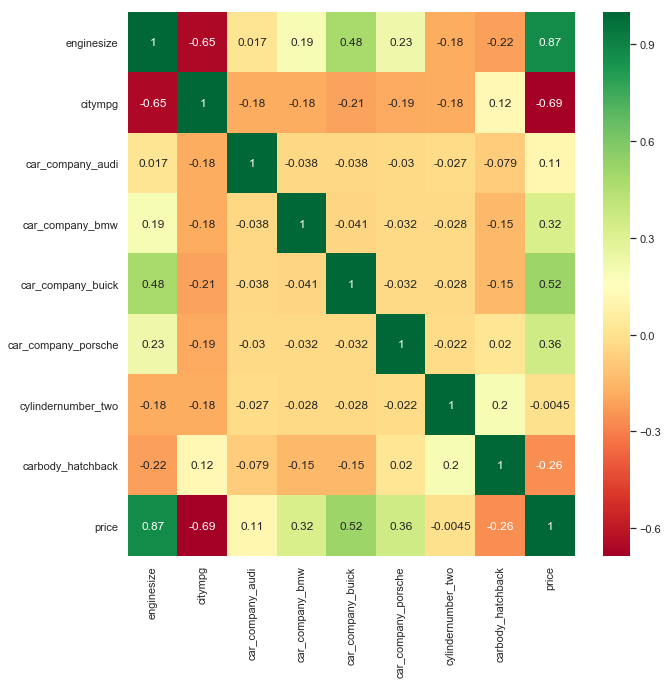

In [75]:
cols =['enginesize', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_porsche', 'cylindernumber_two',
       'carbody_hatchback','price']
at_data = at_data[cols]
plt.subplots(figsize =(10,10))
sns.heatmap(at_data.corr(),cmap='RdYlGn',annot =True)
plt.show()

Text(0.5,0,'Errors')

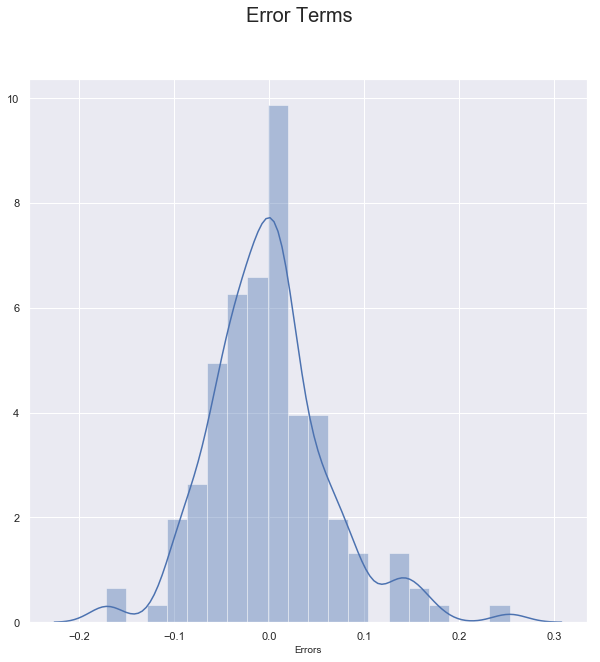

In [76]:
#Plot histogram
fig = plt.figure(figsize =(10,10))
sns.distplot((y_train - y_train_price),bins= 20)
fig.suptitle('Error Terms',fontsize =20) #Plot heading
plt.xlabel('Errors', fontsize =10)


##  Making predictions Using Final mode



In [77]:
at_test.describe()


symboling   wheelbase   carlength   carwidth  carheight   curbweight  \
count  62.000000   62.000000   62.000000  62.000000  62.000000    62.000000   
mean    0.774194   98.827419  173.117742  65.690323  53.798387  2522.596774   
std     1.151184    6.533474   13.363316   2.055597   2.459274   504.050982   
min    -1.000000   88.400000  141.100000  60.300000  49.600000  1488.000000   
25%     0.000000   94.500000  166.550000  63.850000  51.600000  2174.500000   
50%     1.000000   96.500000  172.200000  65.450000  54.100000  2391.500000   
75%     1.000000  102.400000  182.750000  66.800000  55.700000  2997.000000   
max     3.000000  120.900000  208.100000  71.700000  59.800000  3900.000000   

       enginesize  boreratio     stroke  compressionratio      ...        \
count   62.000000  62.000000  62.000000         62.000000      ...         
mean   123.822581   3.278065   3.284113          9.905000      ...         
std     39.517800   0.268070   0.255503          3.733145      ...         
min     61.000000   2.680000   2.640000          7.000000      ...         
25%     98.000000   3.030000   3.190000          8.500000      ...         
50%    110.000000   3.230000   3.350000          9.000000      ...         
75%    144.000000   3.460000   3.407500          9.400000      ...         
max    308.000000   3.800000   3.900000         23.000000      ...         

       cylindernumber_six  cylindernumber_three  cylindernumber_twelve  \
count           62.000000             62.000000                   62.0   
mean             0.177419              0.016129                    0.0   
std              0.385142              0.127000                    0.0   
min              0.000000              0.000000                    0.0   
25%              0.000000              0.000000                    0.0   
50%              0.000000              0.000000                    0.0   
75%              0.000000              0.000000                    0.0   
max              1.000000              1.000000                    0.0   

       cylindernumber_two  drivewheel_fwd  drivewheel_rwd  carbody_hardtop  \
count           62.000000       62.000000       62.000000        62.000000   
mean             0.016129        0.612903        0.338710         0.016129   
std              0.127000        0.491062        0.477134         0.127000   
min              0.000000        0.000000        0.000000         0.000000   
25%              0.000000        0.000000        0.000000         0.000000   
50%              0.000000        1.000000        0.000000         0.000000   
75%              0.000000        1.000000        1.000000         0.000000   
max              1.000000        1.000000        1.000000         1.000000   

       carbody_hatchback  carbody_sedan  carbody_wagon  
count          62.000000      62.000000      62.000000  
mean            0.290323       0.500000       0.161290  
std             0.457617       0.504082       0.370801  
min             0.000000       0.000000       0.000000  
25%             0.000000       0.000000       0.000000  
50%             0.000000       0.500000       0.000000  
75%             1.000000       1.000000       0.000000  
max             1.000000       1.000000       1.000000  

[8 rows x 63 columns]

In [78]:
at_test['price']

145    11259.0
203    22470.0
121     6692.0
140     7603.0
184     7995.0
27      8558.0
93      7349.0
122     7609.0
143     9960.0
202    21485.0
191    13295.0
187     9495.0
20      6575.0
28      8921.0
39      8845.0
23      7957.0
186     8495.0
18      5151.0
102    14399.0
183     7975.0
2      16500.0
148     8013.0
17     36880.0
175     9988.0
181    15750.0
44      8916.5
150     5348.0
79      7689.0
21      5572.0
26      7609.0
        ...   
104    17199.0
163     8058.0
87      9279.0
193    12290.0
168     9639.0
109    12440.0
161     8358.0
115    16630.0
56     11845.0
86      8189.0
46     11048.0
85      6989.0
34      7129.0
179    15998.0
118     5572.0
116    17950.0
73     40960.0
199    18950.0
114    17075.0
33      6529.0
200    16845.0
188     9995.0
14     24565.0
128    37028.0
22      6377.0
107    11900.0
101    13499.0
173     8948.0
40     10295.0
189    11595.0
Name: price, Length: 62, dtype: float64

In [79]:
#Scaling test data
scaling_variable = ['wheelbase','symboling','carlength','carwidth','carheight','curbweight','horsepower','citympg','highwaympg','price','stroke','boreratio','compressionratio','enginesize','peakrpm']

at_test[scaling_variable] = scaler.transform(at_test[scaling_variable])
at_test.describe()
at_test


symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
145        0.4   0.358621   0.472414  0.342857   0.541667    0.338717   
203        0.2   0.775862   0.762069  0.676190   0.641667    0.639184   
121        0.6   0.244828   0.391379  0.190476   0.250000    0.117297   
140        0.8   0.231034   0.218966  0.190476   0.658333    0.223969   
184        0.8   0.368966   0.467241  0.352381   0.658333    0.234169   
27         0.6   0.244828   0.218966  0.190476   0.233333    0.203145   
93         0.6   0.272414   0.441379  0.190476   0.475000    0.132172   
122        0.6   0.244828   0.391379  0.190476   0.250000    0.203145   
143        0.4   0.365517   0.472414  0.342857   0.391667    0.266468   
202        0.2   0.775862   0.762069  0.676190   0.641667    0.552061   
191        0.4   0.475862   0.613793  0.485714   0.608333    0.402890   
187        0.8   0.368966   0.467241  0.352381   0.658333    0.257544   
20         0.4   0.272414   0.244828  0.171429   0.350000    0.083298   
28         0.2   0.575862   0.517241  0.266667   1.000000    0.349341   
39         0.4   0.341379   0.531034  0.323810   0.525000    0.251169   
23         0.6   0.244828   0.218966  0.190476   0.250000    0.176371   
186        0.8   0.368966   0.467241  0.352381   0.658333    0.238844   
18         0.8   0.062069  -0.060345 -0.142857   0.450000   -0.095623   
102        0.4   0.475862   0.689655  0.447619   0.691667    0.672758   
183        0.8   0.368966   0.467241  0.352381   0.658333    0.210795   
2          0.6   0.272414   0.458621  0.352381   0.383333    0.471738   
148        0.4   0.355172   0.500000  0.342857   0.591667    0.300467   
17         0.4   0.806897   0.903448  0.866667   0.708333    0.761581   
175        0.2   0.544828   0.534483  0.447619   0.508333    0.297918   
181        0.2   0.617241   0.744828  0.447619   0.525000    0.611135   
44         0.6   0.272414   0.194828  0.171429   0.350000    0.068423   
150        0.6   0.313793   0.243103  0.171429   0.558333    0.115597   
79         0.6   0.220690   0.218966  0.190476   0.250000    0.183595   
21         0.6   0.244828   0.218966  0.190476   0.250000    0.069273   
26         0.6   0.244828   0.218966  0.190476   0.233333    0.117297   
..         ...        ...        ...       ...        ...         ...   
104        1.0   0.162069   0.450000  0.580952   0.158333    0.577136   
163        0.6   0.272414   0.415517  0.209524   0.400000    0.193795   
87         0.6   0.334483   0.479310  0.342857   0.316667    0.293243   
193        0.4   0.475862   0.663793  0.485714   0.608333    0.361241   
168        0.8   0.406897   0.544828  0.361905   0.350000    0.349766   
109        0.4   0.951724   0.936207  0.628571   0.908333    0.644709   
161        0.4   0.313793   0.374138  0.247619   0.416667    0.173821   
115        0.4   0.734483   0.725862  0.628571   0.741667    0.578836   
56         1.0   0.300000   0.420690  0.371429   0.150000    0.283468   
86         0.6   0.334483   0.479310  0.342857   0.316667    0.294093   
46         0.8   0.324138   0.482759  0.323810   0.300000    0.433914   
85         0.6   0.334483   0.479310  0.342857   0.316667    0.277093   
34         0.6   0.244828   0.093103  0.209524   0.400000    0.103272   
179        1.0   0.562069   0.670690  0.561905   0.350000    0.553761   
118        0.6   0.244828   0.218966  0.190476   0.250000    0.087123   
116        0.4   0.734483   0.725862  0.628571   0.741667    0.654059   
73         0.4   1.182759   1.094828  0.942857   0.741667    0.929452   
199        0.2   0.610345   0.762069  0.514286   0.808333    0.613685   
114        0.4   0.951724   0.936207  0.628571   0.908333    0.753081   
33         0.6   0.244828   0.093103  0.209524   0.400000    0.096473   
200        0.2   0.775862   0.762069  0.676190   0.641667    0.526562   
188        0.8   0.368966   0.467241  0.352381   0.658333    0.249469   
14         0.6   0.582759   0.765517  0.485714   0.658333    0.

In [80]:
#separating test data
y_test = at_test.pop('price')



In [81]:
# Creating X_test dataframe
cols =['enginesize', 'citympg', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_porsche', 'cylindernumber_two',
       'carbody_hatchback']
X_test = at_test[cols]


In [82]:
y_test


145    0.152450
203    0.430763
121    0.039075
140    0.061690
184    0.071421
27     0.085398
93     0.055385
122    0.061839
143    0.120203
202    0.406311
191    0.202994
187    0.108659
20     0.036170
28     0.094409
39     0.092523
23     0.070478
186    0.083834
18     0.000819
102    0.230401
183    0.070925
2      0.282558
148    0.071868
17     0.788491
175    0.120898
181    0.263939
44     0.094298
150    0.005710
79     0.063825
21     0.011271
26     0.061839
         ...   
104    0.299911
163    0.072985
87     0.103297
193    0.178045
168    0.112234
109    0.181769
161    0.080433
115    0.285785
56     0.166998
86     0.076238
46     0.147212
85     0.046448
34     0.049923
179    0.270096
118    0.011271
116    0.318554
73     0.889777
199    0.343379
114    0.296832
33     0.035028
200    0.291123
188    0.121071
14     0.482771
128    0.792165
22     0.031255
107    0.168363
101    0.208058
173    0.095080
40     0.128519
189    0.160791
Name: price, Length: 62,

In [83]:
# Adding constant variable to test dataframe
X_test_final = sm.add_constant(X_test)
X_test_final

const  enginesize   citympg  car_company_audi  car_company_bmw  \
145    1.0    0.148438  0.305556                 0                0   
203    1.0    0.292969  0.361111                 0                0   
121    1.0    0.078125  0.500000                 0                0   
140    1.0    0.148438  0.361111                 0                0   
184    1.0    0.105469  0.666667                 0                0   
27     1.0    0.109375  0.305556                 0                0   
93     1.0    0.105469  0.500000                 0                0   
122    1.0    0.109375  0.500000                 0                0   
143    1.0    0.148438  0.361111                 0                0   
202    1.0    0.402344  0.138889                 0                0   
191    1.0    0.257812  0.166667                 0                0   
187    1.0    0.105469  0.666667                 0                0   
20     1.0    0.078125  0.694444                 0                0   
28     1.0    0.203125  0.305556                 0                0   
39     1.0    0.156250  0.388889                 0                0   
23     1.0    0.109375  0.305556                 0                0   
186    1.0    0.152344  0.388889                 0                0   
18     1.0   -0.035156  0.944444                 0                0   
102    1.0    0.433594  0.111111                 0                0   
183    1.0    0.152344  0.388889                 0                0   
2      1.0    0.320312  0.166667                 0                0   
148    1.0    0.148438  0.277778                 0                0   
17     1.0    0.542969  0.055556                 0                1   
175    1.0    0.203125  0.388889                 0                0   
181    1.0    0.355469  0.166667                 0                0   
44     1.0    0.078125  0.694444                 0                0   
150    1.0    0.085938  0.611111                 0                0   
79     1.0    0.109375  0.305556                 0                0   
21     1.0    0.078125  0.666667                 0                0   
26     1.0    0.078125  0.500000                 0                0   
..     ...         ...       ...               ...              ...   
104    1.0    0.433594  0.166667                 0                0   
163    1.0    0.109375  0.444444                 0                0   
87     1.0    0.156250  0.277778                 0                0   
193    1.0    0.152344  0.333333                 0                0   
168    1.0    0.296875  0.305556                 0                0   
109    1.0    0.195312  0.166667                 0                0   
161    1.0    0.109375  0.416667                 0                0   
115    1.0    0.195312  0.166667                 0                0   
56     1.0    0.000000  0.111111                 0                0   
86     1.0    0.203125  0.333333                 0                0   
46     1.0    0.191406  0.305556                 0                0   
85     1.0    0.203125  0.333333                 0                0   
34     1.0    0.085938  0.472222                 0                0   
179    1.0    0.394531  0.166667                 0                0   
118    1.0    0.078125  0.666667                 0                0   
116    1.0    0.320312  0.416667                 0                0   
73     1.0    0.929688  0.027778                 0                0   
199    1.0    0.234375  0.111111                 0                0   
114    1.0    0.320312  0.333333                 0                0   
33     1.0    0.085938  0.472222                 0                0   
200    1.0    0.277344  0.277778                 0                0   
188    1.0    0.152344  0.361111                 0                0   
14     1.0    0.367188  0.194444                 0                1   
128    1.0    0.484375  0.111111                 0                0   
22     1.0    0.078125  0.500

In [84]:
# Making predictions using the  model
y_test_pred = lr_model_16.predict(X_test_final)
y_test_pred

145    0.141573
203    0.239675
121    0.054393
140    0.095395
184    0.045134
27     0.112384
93     0.074826
122    0.077744
143    0.131676
202    0.360992
191    0.248045
187    0.045134
20     0.019754
28     0.182438
39     0.132565
23     0.076103
186    0.129646
18    -0.145712
102    0.389292
183    0.129646
2      0.258466
148    0.146522
17     0.650043
175    0.131311
181    0.321017
44     0.019754
150    0.004156
79     0.076103
21    -0.011579
26     0.054393
         ...   
104    0.343114
163    0.087642
87     0.152360
193    0.139544
168    0.252491
109    0.201343
161    0.056309
115    0.201343
56     0.194511
86     0.177489
46     0.137400
85     0.177489
34     0.028899
179    0.313925
118   -0.011579
116    0.250210
73     0.979620
199    0.240429
114    0.265056
33     0.028899
200    0.242845
188    0.134595
14     0.493950
128    0.662962
22     0.018112
107    0.201343
101    0.389292
173    0.157695
40     0.132565
189    0.144492
Length: 62, dtype: float

## Model Evaluation

Let's now calculate the r2_score and plot the graph for actual versus predicted values.

In [85]:
#Finding the r2_score for model
from sklearn.metrics import  r2_score
r_square_value = r2_score(y_test, y_test_pred)

r_square_value

0.8488381194579248

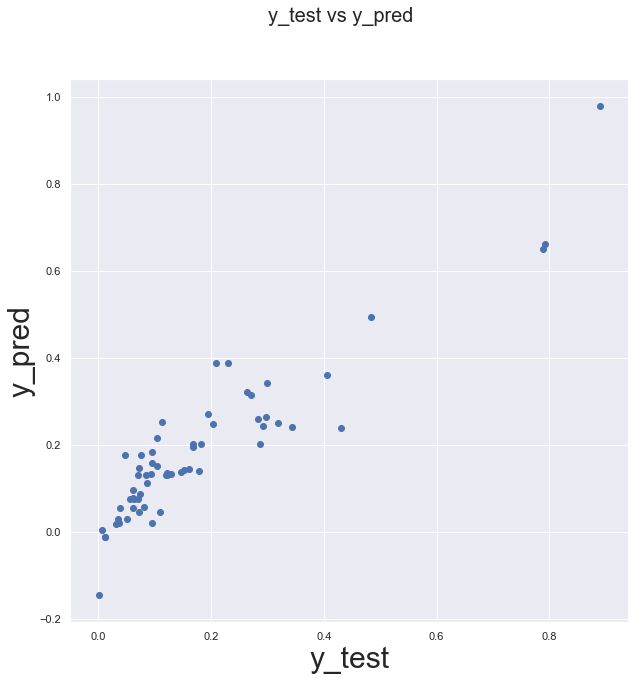

In [86]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize =(10,10))
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 30)                          # X-label
plt.ylabel('y_pred', fontsize = 30)
plt.show()

Text(0,0.5,'Price')

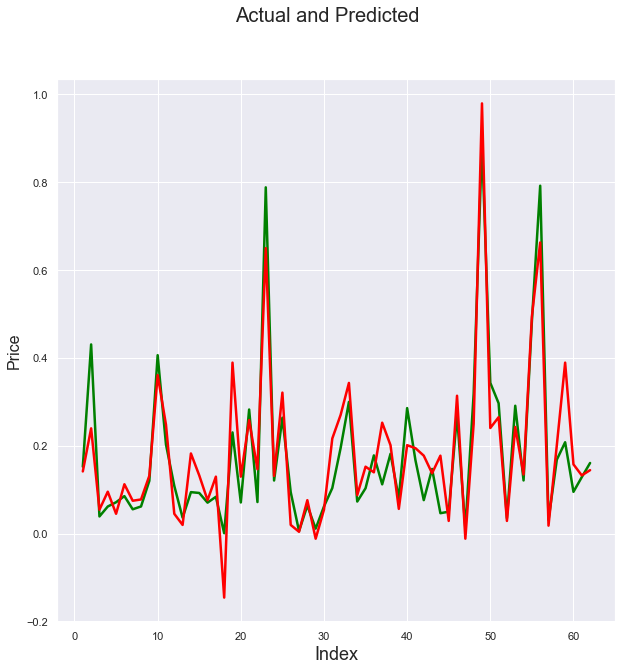

In [87]:
#Actual vs Predicted for easier analysis
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(10,10))
plt.plot(c,y_test, color="green", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-label

In [88]:
#Finding  price using equation

y_actual_predicted =  0.085090 + 0.747235 * X_test_final['enginesize'] - 0.178148 * X_test_final['citympg'] + 0.088159 * X_test_final['car_company_audi']
+ 0.169125 * X_test_final['car_company_bmw']+ 0.204784 * X_test_final['car_company_buick'] + 0.235725 * X_test_final['car_company_porsche']    
+0.165497 * X_test_final['cylindernumber_two']+X_test_final['carbody_hatchback'] * -0.036281
y_actual_predicted
#therefor our model is ready with 84.88 R2 and 

145    0.141574
203    0.239675
121    0.054394
140    0.131676
184    0.045135
27     0.112385
93     0.074826
122    0.077745
143    0.131676
202    0.360993
191    0.248045
187    0.045135
20     0.019754
28     0.182438
39     0.132566
23     0.112385
186    0.129647
18    -0.109431
102    0.389292
183    0.129647
2      0.294747
148    0.146522
17     0.480918
175    0.167592
181    0.321017
44     0.019754
150    0.040437
79     0.112385
21     0.024702
26     0.054394
         ...   
104    0.379395
163    0.087642
87     0.152360
193    0.139544
168    0.252491
109    0.201343
161    0.092590
115    0.201343
56     0.065296
86     0.177489
46     0.173681
85     0.177489
34     0.065180
179    0.350206
118    0.024702
116    0.250210
73     0.774836
199    0.240429
114    0.265056
33     0.065180
200    0.242845
188    0.134595
14     0.324825
128    0.427238
22     0.054394
107    0.201343
101    0.389292
173    0.157695
40     0.132566
189    0.144492
Length: 62, dtype: float

In [89]:
#Removing scaling from y_prediced to see actual prediced prices
#SPliting data into Test-Train data
from sklearn.model_selection import train_test_split
print('Splitting into training and testing...')
actual_train, actual_test = train_test_split(at_data, train_size = 0.70, test_size=0.30, random_state=32)
actual_test

Splitting into training and testing...


enginesize  citympg  car_company_audi  car_company_bmw  \
145         108       24                 0                0   
203         145       26                 0                0   
121          90       31                 0                0   
140         108       26                 0                0   
184          97       37                 0                0   
27           98       24                 0                0   
93           97       31                 0                0   
122          98       31                 0                0   
143         108       26                 0                0   
202         173       18                 0                0   
191         136       19                 0                0   
187          97       37                 0                0   
20           90       38                 0                0   
28          122       24                 0                0   
39          110       27                 0                0   
23           98       24                 0                0   
186         109       27                 0                0   
18           61       47                 0                0   
102         181       17                 0                0   
183         109       27                 0                0   
2           152       19                 0                0   
148         108       23                 0                0   
17          209       15                 0                1   
175         122       27                 0                0   
181         161       19                 0                0   
44           90       38                 0                0   
150          92       35                 0                0   
79           98       24                 0                0   
21           90       37                 0                0   
26           90       31                 0                0   
..          ...      ...               ...              ...   
104         181       19                 0                0   
163          98       29                 0                0   
87          110       23                 0                0   
193         109       25                 0                0   
168         146       24                 0                0   
109         120       19                 0                0   
161          98       28                 0                0   
115         120       19                 0                0   
56           70       17                 0                0   
86          122       25                 0                0   
46          119       24                 0                0   
85          122       25                 0                0   
34           92       30                 0                0   
179         171       19                 0                0   
118          90       37                 0                0   
116         152       28                 0                0   
73          308       14                 0                0   
199         130       17                 0                0   
114         152       25                 0                0   
33           92       30                 0                0   
200         141       23                 0                0   
188         109       26                 0                0   
14          164       20                 0                1   
128         194       17                 0                0   
22           90       31                 0                0   
107         120       19                 0                0   
101         181       17                 0                0   
173         122       29                 0                0   
40          110       27                 0                0   
189         109       24                 0                0   

     car_company_buick  car_company_porsche  cylindernumber_two  \
145                  0         

In [90]:
y_test_actual = actual_test.pop('price')
arr = np.array(y_test_actual)
y_test_actual = arr.reshape(-1, 1) 


In [91]:
#Scaling actual price
y_scaler = MinMaxScaler()
y_scaler.fit_transform(y_test_actual)
arr = np.array(y_actual_predicted)
y_predicted = arr.reshape(-1, 1) 

In [92]:
#Actual price from y_predicted
y_price_predicted = y_scaler.inverse_transform(y_predicted)
y_price_predicted

array([[10220.60847667],
       [13733.53216182],
       [ 7098.78523423],
       [ 9866.20282489],
       [ 6767.22518048],
       [ 9175.38433155],
       [ 7830.44213582],
       [ 7934.96455033],
       [ 9866.20282489],
       [18077.78237526],
       [14033.25021244],
       [ 6767.22518048],
       [ 5858.36545301],
       [11683.92227983],
       [ 9898.04482802],
       [ 9175.38433155],
       [ 9793.52241351],
       [ 1232.38999917],
       [19091.16451725],
       [ 9793.52241351],
       [15705.60884463],
       [10397.81130256],
       [22372.19777535],
       [11152.31380216],
       [16646.31057523],
       [ 5858.36545301],
       [ 6599.0187597 ],
       [ 9175.38433155],
       [ 6035.5682789 ],
       [ 7098.78523423],
       [12906.34925084],
       [16123.69850267],
       [18736.75886547],
       [ 8289.37020211],
       [10606.85613158],
       [10147.92806529],
       [14192.46022811],
       [12360.89158025],
       [ 8466.57302799],
       [12360.89158025],
